<a href="https://colab.research.google.com/github/mlromero13/NotRistAtAll/blob/main/NotRiskAtAll(RG%3B_RH%3B_MR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico final de integración
# Grupo 5 "besgrupeva"

Integrantes: Raul Garcia / Rodrigo Hidalgo / Maximiliano Romero


# Introducción al Problema

**Planteamiento del problema** 
* Somos besgrupeva, una consultora joven pero pujante en el mercado del data science, Nuestro cliente "NotRiskAtAll " se encuentra peocupado por la alta tasa de morosidad que se experimenta en latinoamérica en esta era post Covid. En los últimos años, el CEO (mr bigote), ha recopilado mucha información de datos bancarios, crediticios, y poblacionales de muchos de sus clientes. Por otro lado, siendo un entusiasta seguidor de los foros de tendencias de negocios ha llegado a la idea de que el machine learning puede ayudarle a construir un modelo que le permita saber a que futuros clientes prestarles y a cuales no.

**Objetivo**
 * Identificar la calificación crediticia (Credit_Score), de un cliente y calificarla en base a dos niveles posibles “Good (1) & Poor (0)”.**

**Referencias y Fuente de datos**
https://www.kaggle.com/datasets/parisrohan/credit-score-classification


**Objetivos Generales:**
1. Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science.
2. Describir los datos de negocio y las relaciones entre datos mediante el Análisis Exploratorio de Datos.
3. Elegir el algoritmo de entrenamiento y preparar los datos para el proceso de entrenamiento del modelo.
4. Evaluar los indicadores de desempeño predictivo del modelo y realizar optimizaciones.
5. Construir una presentación ejecutiva para la alta gerencia mostrando los resultados del modelo.

**1. Entendiendo el problema**
Dada la información relacionada con datos crediticios y poblacionales de las personas, se debe crear un modelo de aprendizaje automático que pueda clasificar el puntaje crediticio. Para ello utilizaremos herrmientas de clasificación (aprendizaje supervisado, pues existe un flag con el resultado deseado).


**2. Describir los datos de negocio e identificar los elementos a ser considerados para el planteamieto del modelo de Data Science**
Si bien, el set de datos se compone de solo una tabla, es necesario traer a colación que el dataset no puede ser utilizado tal cual está por los siguientes motivos:
* aun no conocemos en detalle como es el set en si.
* existen datos faltantes e incorrectos
* los clientes aparecen muchas veces en el set, por lo cual es necesario sumarizar y perfilar el set.
* pueden existir variables redundantes o irrelevantes.

    **### estos puntos se profundizarán en el apartado EDA (exploratory data analysis)###**

**3. Construir una presentación ejecutiva para la alta gerencia mostrando los resultados obtenidos**


# Configuración y librerías
Intentademos ir agregando en estas líneas las librerías a medida que las precisemos.

In [ ]:
!pip3 install pandas_profiling --upgrade

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import pandas_profiling

from statistics import mode

#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import StandardScaler

#from imblearn.over_sampling import SMOTE
#from sklearn.metrics import (confusion_matrix, accuracy_score)
#from sklearn.metrics import ConfusionMatrixDisplay

# Carga del data set (Credit_score_train)

In [ ]:
# Código para carga local
#A traves de pd.read_csv() podremos cargar el archivo.
# df_full = pd.read_csv('Credit_score_train.csv')

In [ ]:
# Código para correr directo desde github
# A traves de pd.read_csv() podremos cargar el archivo.
url = 'https://raw.githubusercontent.com/mlromero13/NotRistAtAll/main/DataSet/Credit_score_train.csv'
df_full = pd.read_csv(url)
#df_full = pd.read_csv('Credit_score_train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Análisis rápido de la carga



In [ ]:
# primero vemos cuantos registros tiene el set de datos.
print('largo del df: ',len(df_full))

largo del df:  100000


In [ ]:
#miramos la columnas
df_full.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
#Detalle por medio del DataFrame.Info() para entender la cantidad de variables, la cantidad de datos y el tipo de dats de cada una.
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
# Primer acercamiento a los datos del set
df_full.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
# Se realiza un describe + un transpose para leer mejor los datos.
df_full.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.17,3183.69,303.65,1625.57,3093.75,5957.45,15204.63
Num_Bank_Accounts,100000.0,17.09,117.40,-1.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.0,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.0,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Delay_from_due_date,100000.0,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_Credit_Inquiries,98035.0,27.75,193.18,0.00,3.00,6.00,9.00,2597.00
Credit_Utilization_Ratio,100000.0,32.29,5.12,20.00,28.05,32.31,36.50,50.00
Total_EMI_per_month,100000.0,1403.12,8306.04,0.00,30.31,69.25,161.22,82331.00


Aqui nos damos cuenta que hay variables que deberían ser numéricas pero estan como object y es por ello que no aparecen en el describe.

## Estudio macro de las variables

# **<<< Comienza Limpieza y trabajo de variables >>>**

Ahora, vamos a agregar algúnas líneas de código para entender un poco mejor los datos. Mediante un iterador del tipo 'for', chequaremos las cantidades, tipo, nulls y valores únicos de cada variable. Nos dejaremos un espacion en la impresión para poder hacer un copy+paste del resultado del código y poder hacer anotaciones preliminares del set previos al EDA.


```
# Despues de hacer varias veces esto para un par de variables, y cansados de cambiar datos hicimos esta genialidad:
columnas=df_full.columns
columnas=df_full.columns
for col in columnas:
  print('**********************************************************************************************************')
  print('* Variable:',col,
        '.\n  * ->Tipo de datos: ',df_full[col].dtype, 
        ' . -> valores totales: ',df_full[col].count(),
        '. -> No nulos: ',df_full[col][df_full[col].notna()==True].count(),
        '. -> % nulos: ',(df_full[col].count()-df_full[col][df_full[col].notna()==True].count())/df_full[col].count(),
        '. -> Unicos: ',df_full[col].nunique(),'\n   * Notas Manuales: \n')
  print('-------------------------------------------------------------------------------------------------------------------------')
  print('Variable: ',df_full[col].dtype)
  print('Unicos: ',df_full[col].nunique(),'\n')
  print('Conteo único: ',df_full[col].value_counts().sort_values(ascending=False),'\n')
  print('\n Estadistica descriptiva:\n',df_full[col].value_counts().describe())
  print('- END - \n \n')
```
A continuación podemos ver su salida 😀


### Probando el código 

A continuación haremos un código que nos permita recorrer las columnas de una manera adicional al describe y al .info

In [ ]:
columnas=df_full.columns
for col in columnas:
  print('**********************************************************************************************************')
  print('* Variable:',col,
        '.\n  * ->Tipo de datos: ',df_full[col].dtype, 
        ' . -> valores totales: ',df_full[col].count(),
        '. -> No nulos: ',df_full[col][df_full[col].notna()==True].count(),
        '. -> % nulos: ',(df_full[col].count()-df_full[col][df_full[col].notna()==True].count())/df_full[col].count(),
        '. -> Unicos: ',df_full[col].nunique(),'\n   * Notas Manuales: \n')
  print('-------------------------------------------------------------------------------------------------------------------------')
  print('Variable: ',df_full[col].dtype)
  print('Unicos: ',df_full[col].nunique(),'\n')
  print('Conteo único: ',df_full[col].value_counts().sort_values(ascending=False),'\n')
  print('\n Estadistica descriptiva:\n',df_full[col].value_counts().describe())
  print('- END - \n \n')

**********************************************************************************************************
* Variable: ID .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  100000 
   * Notas Manuales: 

-------------------------------------------------------------------------------------------------------------------------
Variable:  object
Unicos:  100000 

Conteo único:  0x1602     1
0x1672     1
0x1607     1
0x1608     1
0x1609     1
          ..
0x25feb    1
0x25fec    1
0x25fdf    1
0x25fcf    1
0x25fed    1
Name: ID, Length: 100000, dtype: int64 


 Estadistica descriptiva:
 count    100000.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: ID, dtype: float64
- END - 
 

**********************************************************************************************************
* Variable: Customer_ID .
  * ->Tipo de datos:  object  

###  Descripción de las variables y acciones preliminares


Ahora hacemos una copia de este texto y con ello aprovecharemoas para describir preliminarmente las variables y el primer curso de acción de la limplieza y trabajo del set.

**********************************************************************************************************
* Variable: ID .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  100000 
   * Notas Manuales: Es el Index del data frame, en esta instancia no aportará mucho al modelo. Descartarla.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Customer_ID .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  12500 
   * Notas Manuales: Es el número de cliente. Cada cliente aparece varias veces, de hecho hasta 8 renglones por cliente y cada renglon es un mes. son 12500 clientes x 8 meses cada uno. De alguna manera este dato nos servirá para sumarizar el gran set.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Month .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  8 
   * Notas Manuales: Como los clientes se repiten varias veces, este dato permite en combinación con el número de cliente, ubicar de manera univoca cada registro. El mes se encuentra expresado en formato texto, podemos pasarlo a numero ordinal para mejor trabajo. Recordemoa que nos permitirá en combinación con el customer id sumarizar la tabla.
-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Name .
  * ->Tipo de datos:  object  . -> valores totales:  90015 . -> No nulos:  90015 . -> % nulos:  0.0 . -> Unicos:  10139 
   * Notas Manuales: Es el nombre de los clientes. Tiene alcunos missings y posiblemente malas escrituras o errores. Consideramos que no aporta al analisis dado que el verdadero identificador de los clientes sera el Customer id. Descartarla.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Age .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  1788 
   * Notas Manuales: Es la edad del cliente. Si bien esta almacenado como texto, son números. Podemos observar Erroneos como ser el -500. Conviene castearla a número y ver algúna especie de replace para los outlayers. Este replace no debe afectar la capacidad de sumarización posterior. Hay que pasarlo a numero y analizar pues 1788 valores parecería que es mucho para las posibles edades. Se esperann menos 100 edades.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: SSN .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  12501 
   * Notas Manuales:  Es el numero de seguridad social, se supone que debrería coincidir en cardinalidad con el número de cliente pero resulta que en este caso hay un valor más. Este es el valor #F%$D@*&8 y aparece en muchos meses. Si bien podemos arreglarla, consideramos que con el número de cliente como identificador ya es suficiente. Descartarla.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Occupation .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  16 
   * Notas Manuales: Es la ocupacion de los clientes. Vemos que hay 16 valores, el formato texto es correcto. Pinta a ser una buena variable. Hay que chequear si para los distintos meses, un cliente tiene distinto trabajo, en ese caso, tomaremos una decisión. La moda o mediana, es un estadístico prometedor.


-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Annual_Income .
  * ->Tipo de datos:  float64  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  13487 
   * Notas Manuales: Es el ingreso anual del cliente. Hay que trabajarlo para que sea un numero sin outlayers. Mismas consideraciones que la variable anterior con la existencia de varios valores.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Monthly_Inhand_Salary .
  * ->Tipo de datos:  float64  . -> valores totales:  84998 . -> No nulos:  84998 . -> % nulos:  0.0 . -> Unicos:  13235 
   * Notas Manuales: Ingreso mensual. Vemos muchos faltantes, claramente es una variable correlacionada a la anterior. Se puede llenar con la anterior en el caso de los faltantes y/o descartarla.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Num_Bank_Accounts .
  * ->Tipo de datos:  int64  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  943 
   * Notas Manuales: Ws la cantidad de cuentas que tienen los clientes. Vemos que 943 valores únicos o distintivos parecería mucho. Es conveniente chequear mínimos y máximos probables.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Num_Credit_Card .
  * ->Tipo de datos:  int64  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  1179 
   * Notas Manuales: Es la cantidad de tarjetas de crédito que tienen los clientes. Como se encuentra expresada en texto, primero deberíamos pasarla a númerica. Por otro lado, 1179 valores únicos o distintivos parecería mucho tambien (al igual que en la variable anterior).

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Interest_Rate .
  * ->Tipo de datos:  int64  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  1750 
   * Notas Manuales: Es la tasa de interes de o de los prestamo. Por otro lado luego hay que entender como varían en los distintos meses meses y tomar decisiones de simplificación.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Num_of_Loan .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  434 
   * Notas Manuales: Es el número de prestamos tomados por el cliente. Seguro hay outlayers porque 434 parecerían demasiadas alternativas. Tambien debemos vero como sumarizarla entre distintos meses. 

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Type_of_Loan .
  * ->Tipo de datos:  object  . -> valores totales:  88592 . -> No nulos:  88592 . -> % nulos:  0.0 . -> Unicos:  6260 
   * Notas Manuales: Al analizar esta variable, vemos que es un texto concatenado de la cantidad de prestamos, nos puede servir para chequear la anterior. Podemos contar la cantidad de comas y sumarle uno.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Delay_from_due_date .
  * ->Tipo de datos:  int64  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  73 
   * Notas Manuales: De un análisis rápido se ve que hay valores que seguro son errores de tipeo o improvables.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Num_of_Delayed_Payment .
  * ->Tipo de datos:  object  . -> valores totales:  92998 . -> No nulos:  92998 . -> % nulos:  0.0 . -> Unicos:  749 
   * Notas Manuales: Debería ser un número, hay que castearlo y sacarle los caracteres raros.
-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Changed_Credit_Limit .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  4384 
   * Notas Manuales: Debería ser un porcentaje que expresa el cambio en % del limite de crédito. Castear y sacar símbolos raros. ojo con los negativos. Por otro lado si no entendemos como se calcula de poco nos va a servir.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Num_Credit_Inquiries .
  * ->Tipo de datos:  float64  . -> valores totales:  98035 . -> No nulos:  98035 . -> % nulos:  0.0 . -> Unicos:  1223 
   * Notas Manuales: Es la cantidad de tarjetas solicitadas. A juzgar por la cantidad de valores únicos parece que hay outlayers o erroneos. Tambien hay que ver los erroneos y como reconstruirlo con casos correctos de otros meses.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Credit_Mix .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  4 
   * Notas Manuales: Es un texto con una clasificación crediticia del tipo de deuda de los clientes. Esta bueno que solo son 4 valores, puee llegar a tener potencial. el 4to valor suena a minninsg o no clasificados.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Outstanding_Debt .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  13178 
   * Notas Manuales: Es el saldo deudor de la deuda. Debería castearse a número.


-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Credit_Utilization_Ratio .
  * ->Tipo de datos:  float64  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  100000 
   * Notas Manuales: Es el % de utilización del crédito de las tarjetas. Debería ser un número, hay que castearlo.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Credit_History_Age .
  * ->Tipo de datos:  object  . -> valores totales:  90970 . -> No nulos:  90970 . -> % nulos:  0.0 . -> Unicos:  404 
   * Notas Manuales: Es un texto que dice la antiguedad de la historia crediticia del cliente. hay que trabajarlo y llevarlo a números pues es un string que combina años y meses.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Payment_of_Min_Amount .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  3 
   * Notas Manuales: Es un texto que dice si el cliente en ese mes pagó o no el mínimo. Tambien hay un % de datos que no son ni "si" ni "no".

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Total_EMI_per_month .
  * ->Tipo de datos:  float64  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  14950 
   * Notas Manuales: Una cuota mensual equiparada (EMI) es un monto de pago fijo realizado por un prestatario a un prestamista en una fecha específica cada mes calendario. Se calcula como EMI = Deuda x Plazo demanente x Tasa. Debería ser un número, Primero castear luego analizar

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Amount_invested_monthly .
  * ->Tipo de datos:  object  . -> valores totales:  95521 . -> No nulos:  95521 . -> % nulos:  0.0 . -> Unicos:  91049 
   * Notas Manuales: Debería ser un número y representa el saldo en activos de inversión del cliente. Castear y luego analizar.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Payment_Behaviour .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  7 
   * Notas Manuales: Es un texto que clasifica el comportamiento de los gastos del cliente con respecto al comportamiento de los pagos que realiza. Quizas es conveniente partir de alguna manera el dato en dos columnas una de pagos y otra de montos.
-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Monthly_Balance .
  * ->Tipo de datos:  object  . -> valores totales:  98800 . -> No nulos:  98800 . -> % nulos:  0.0 . -> Unicos:  98792 
   * Notas Manuales: Es el saldo en cuenta (disponibilidades) de los clientes. Deberíamos castearlo a número y analizar la distribución.

-------------------------------------------------------------------------------------------------------------------------
**********************************************************************************************************
* Variable: Credit_Score .
  * ->Tipo de datos:  object  . -> valores totales:  100000 . -> No nulos:  100000 . -> % nulos:  0.0 . -> Unicos:  3 
   * Notas Manuales: Esta es nuestra variable testigo, flag o "Y". Tiene 3 niveles y es un string. Quizas debemos llevarla a ordinal, dato a chequear.

-------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Nos fijamos cuantas veces aparece cada customer id.
df_full.groupby('Customer_ID').count()

,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
CUS_0x1000,8,8,7,8,8,8,8,7,8,8,...,8,8,8,8,8,8,8,8,8,8
CUS_0x1009,8,8,8,8,8,8,8,8,8,8,...,8,8,8,7,8,8,8,8,8,8
CUS_0x100b,8,8,7,8,8,8,8,7,8,8,...,8,8,8,7,8,8,7,8,8,8
CUS_0x1011,8,8,8,8,8,8,8,7,8,8,...,8,8,8,8,8,8,8,8,8,8
CUS_0x1013,8,8,8,8,8,8,8,5,8,8,...,8,8,8,7,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS_0xff3,8,8,6,8,8,8,8,7,8,8,...,8,8,8,7,8,8,8,8,8,8
CUS_0xff4,8,8,7,8,8,8,8,7,8,8,...,8,8,8,7,8,8,8,8,8,8
CUS_0xff6,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,7,8,7,8


In [ ]:
# miraremos un cliente en particular
df_full[df_full.Customer_ID=='CUS_0xff3']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5168,0x344a,CUS_0xff3,January,Somervilled,55,726-35-5322,Scientist,17032.785,1176.39875,0,...,Good,1229.08,34.082750,16 Years and 9 Months,No,33.299764,43.04406192285858,High_spent_Medium_value_payments,291.2960495347569,Good
5169,0x344b,CUS_0xff3,February,Somervilled,55,726-35-5322,Scientist,17032.785,1176.39875,0,...,Good,1229.08,34.985115,16 Years and 10 Months,No,33.299764,23.35109287271675,High_spent_Large_value_payments,300.9890185848988,Good
5170,0x344c,CUS_0xff3,March,Somervilled,55,726-35-5322,Scientist,17032.785,1176.39875,0,...,Good,1229.08,33.352900,16 Years and 11 Months,No,33.299764,144.74292660279684,Low_spent_Small_value_payments,229.5971848548186,Good
5171,0x344d,CUS_0xff3,April,NaN,55,726-35-5322,Scientist,17032.785,NaN,0,...,_,1229.08,38.429307,17 Years and 0 Months,No,33.299764,32.69259944530562,High_spent_Medium_value_payments,301.6475120123099,Standard
5172,0x344e,CUS_0xff3,May,Somervilled,55,726-35-5322,Scientist,17032.785,1176.39875,0,...,_,1229.08,36.447249,17 Years and 1 Months,No,33.299764,152.44950277169275,Low_spent_Small_value_payments,221.8906086859228,Standard
5173,0x344f,CUS_0xff3,June,Somervilled,55,726-35-5322,Scientist,17032.785,1176.39875,0,...,Good,1229.08,33.499324,17 Years and 2 Months,No,33.299764,109.41036005251743,Low_spent_Small_value_payments,264.92975140509805,Standard
5174,0x3450,CUS_0xff3,July,Somervilled,55,726-35-5322,Scientist,17032.785,1176.39875,0,...,Good,1229.08,25.402963,17 Years and 3 Months,No,33.299764,84.46199194968126,Low_spent_Large_value_payments,269.8781195079343,Standard
5175,0x3451,CUS_0xff3,August,NaN,55,#F%$D@*&8,Scientist,17032.785,1176.39875,0,...,Good,1229.08,26.915577,NaN,No,33.299764,81.19585741743609,Low_spent_Small_value_payments,293.14425404017936,Standard


Vemos que cada cliente aparece entre 7 y 8 veces, de ahí que debemos sumarizar de alguna manera los datos. (agrupación de features).

Tambien se verifican valores NAN, erróneos o nulos.

A continuación trabajaremos y limpiaremos las variables del set para luego sumarizarlo. Cada variable se tratará de manera independiente haciendo imputaciones sensibles, estadísticas o predictivas según corresponda, o simplemente deprecando dicha variable para evitar información duplicada.

# Tratamiento de variables

En primera instancia tratareremos la variable Annual_Income, como práctica unitaria de limpieza de una variable. Luego, siendo que son bastante columnas, trataremos de recorrer masívamente aquellas que se pueda aplicar la mísma lógica.

# Acondicionando la variable 'Annual_Income'

In [ ]:
#arrancamos con un describe de la variable
df_full.Annual_Income.describe()

count       100000
unique       18940
top       36585.12
freq            16
Name: Annual_Income, dtype: object

Si bien al hacer el .info() ya sabiamos que la variable en estudio es un object / string o similar. de ahi que el describe nos provee menos información. Procederemos entonces a castearla a float.

In [ ]:
#df_full['Annual_Incomecasted2']=df_full['Annual_Income'].astype(float)

Vemos que el casteo falla porque no sabe como convertir los "_" a float, así que previo al casteo la limpiaremos mediante un apply.

In [ ]:
#volvemos a string, aplicamos funcion y casteamos otra vez
# esta funcion remplaza los "_" por ""
def quitarcaracter(celda):
  return celda.replace('_','') 
df_full['Annual_Income']=df_full['Annual_Income'].astype(str)
df_full['Annual_Income']=df_full['Annual_Income'].apply(quitarcaracter)
df_full['Annual_Income']=df_full['Annual_Income'].astype(float)

Hacemos un nuevo describe y ya tenemos la variable lista para operar.

In [ ]:
df_full.Annual_Income.describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Verificamos si existen valores nulos dentro de nuestra variable "Annual Income".
Y observamos que no te exite ninguno.

In [ ]:
df_full.Annual_Income.isna().sum()

0

Ahora vamos a proceder con mirar un poco la variable mediante distintos graficos.

Primero podemos hacer un histograma.

AxesSubplot(0.125,0.125;0.775x0.755)


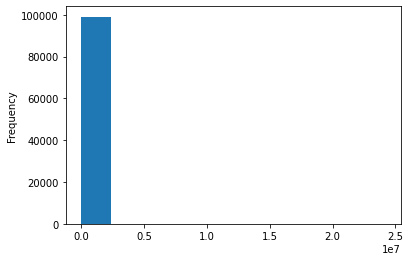

In [ ]:
print(df_full.Annual_Income.plot.hist())

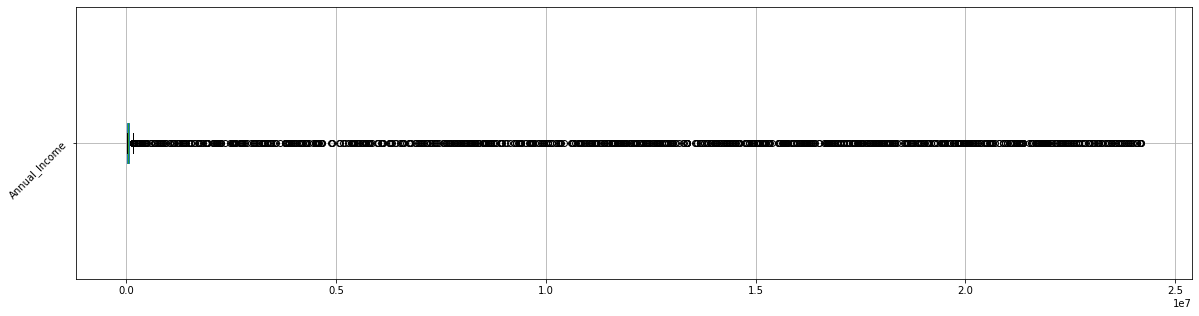

In [ ]:
plt.figure(figsize=(20,5))
stud_bplt = df_full.boxplot(column = ['Annual_Income'],  rot = 45, fontsize= '10', grid = True, vert=False)
stud_bplt.plot()
plt.show()

Puede verse que hay valores muy dispersos, muy altos o son outliers. Creemos que es conveniente truncar la variable.

Usaremos la definicion vista, si el salario es muy alto truncaremos por Tope = q3 + 1,5*(q3-q1).

Podemos aprovechar el apply para quitar decimales.


In [ ]:
Q3=df_full.Annual_Income.quantile(q=.75)
Q1=df_full.Annual_Income.quantile(q=.25)
Tope=(Q3-Q1)*1.5+Q3
Tope

152791.05

In [ ]:
def truncartope(x):
  if x >Tope:
    value = round(Tope/1000, 2)
  else:
    value = round(x/1000, 2)
  return value 

In [ ]:
df_full['Annual_Income']=df_full['Annual_Income'].apply(truncartope)
print(df_full['Annual_Income'].head())
df_full['Annual_Income'].describe()

0    19.11
1    19.11
2    19.11
3    19.11
4    19.11
Name: Annual_Income, dtype: float64


count    100000.000000
mean         51.253250
std          38.684785
min           7.010000
25%          19.460000
50%          37.580000
75%          72.790000
max         152.790000
Name: Annual_Income, dtype: float64

Ahora podemos dibujar y entender mejor la variable.

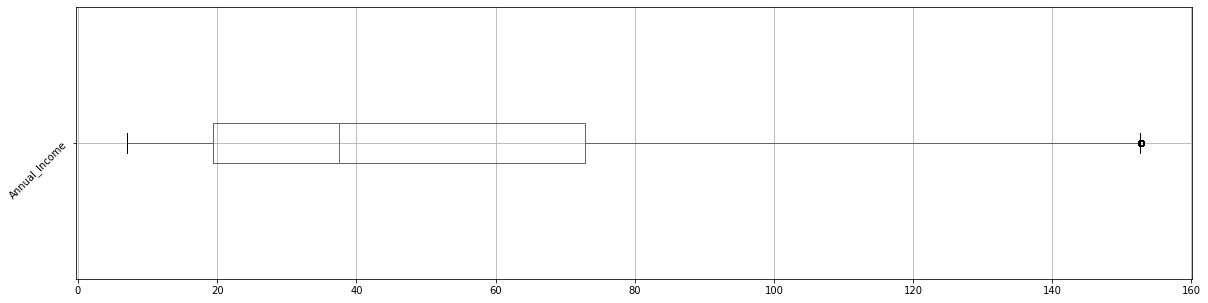

In [ ]:
plt.figure(figsize=(20,5))
stud_bplt = df_full.boxplot(column = ['Annual_Income'],  rot = 45, fontsize= '10', grid = True, vert=False)
stud_bplt.plot()
plt.show()

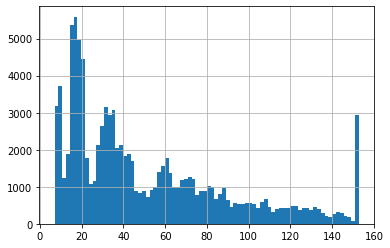

In [ ]:
df_full['Annual_Income'].hist(bins=80)

**La asimetría y curtosis** 
Informan sobre la forma de la distribución de una variable. 

Estas medidas permiten saber las características de su asimetría y homogeneidad sin necesidad de representarlos gráficamente.

**¿Cómo se interpreta la curtosis?**
Indica que tan apuntada o achatada se encuentra una distribución respecto a un comportamiento normal (distribución normal). Si los datos están muy concentrado hacia la media, la distribución es leptocúrtica (curtosis mayor a 0). Si los datos están muy dispersos, la distribución es platicúrtica (curtosis menor a 0).

**¿Cómo se interpreta la asimetría?**
En las interpretaciones de los coeficientes de asimetría los valores menores que 0 indican asimetría negativa; los mayores, asimetría positiva y cuando sea cero, o muy próximo a cero, simétrica. 

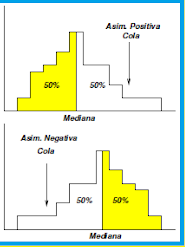

In [ ]:
print("Asimetría: %f" % df_full['Annual_Income'].skew())
print("Curtosis: %f" % df_full['Annual_Income'].kurt())

Asimetría: 1.039967
Curtosis: 0.169995


El análisis univariado nos lleva a la conclusión que debemos analizar en detalle las columnas para emprolijarlas y convertirlas antes de seguir con un profiling.

In [ ]:
df_full.Annual_Income.describe()

count    100000.000000
mean         51.253250
std          38.684785
min           7.010000
25%          19.460000
50%          37.580000
75%          72.790000
max         152.790000
Name: Annual_Income, dtype: float64

# Limpieza del resto de las variables

# Imputación y correccion masiva de variables numéricas almacenadas como texto

Primero trataremos de manera masiva las variablles que son numericas, deberían ser numericas y que pueden estar almamacenadas como objetc.

In [ ]:
#hacemos una lista de las VARIABLES que recorreremos
colobject={'Age','Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio',  'Total_EMI_per_month',
       'Amount_invested_monthly','Monthly_Balance'
       }
print('Trataremos ',len(colobject),' variables.')
colobject

Trataremos  15  variables.


{'Age',
 'Amount_invested_monthly',
 'Changed_Credit_Limit',
 'Credit_Utilization_Ratio',
 'Delay_from_due_date',
 'Interest_Rate',
 'Monthly_Balance',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_Credit_Inquiries',
 'Num_of_Delayed_Payment',
 'Num_of_Loan',
 'Outstanding_Debt',
 'Total_EMI_per_month'}

Para estas variables realizaremos las siguientes acciones de imputación masiva:


1.   Convertiremos a float mediante la función pd.to numeric + coerce.
2.   Truncaremos los valores improbables a acorde al 1,5 veces el rango intercuartil. Si el valor de corte inferior da negativo, dejaremos 0 por entendimiento de las variables.



1 

Num_Bank_Accounts -Antes

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64


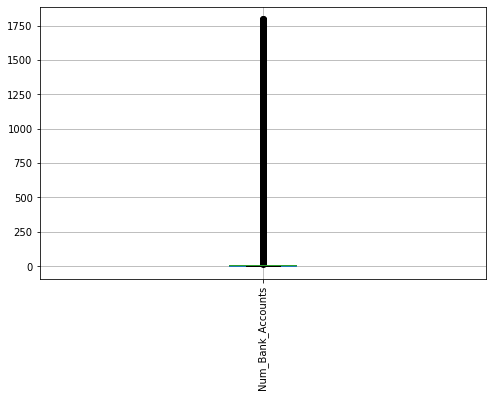



 Num_Bank_Accounts -Despues
count    100000.000000
mean          5.468200
std           2.719004
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max          13.000000
Name: Num_Bank_Accounts, dtype: float64


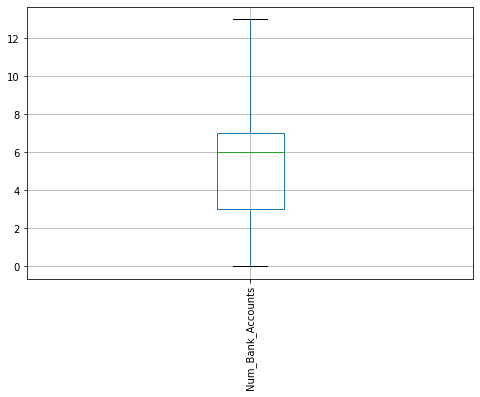

*******************************
2 

Changed_Credit_Limit -Antes

count     100000
unique      4384
top            _
freq        2091
Name: Changed_Credit_Limit, dtype: object


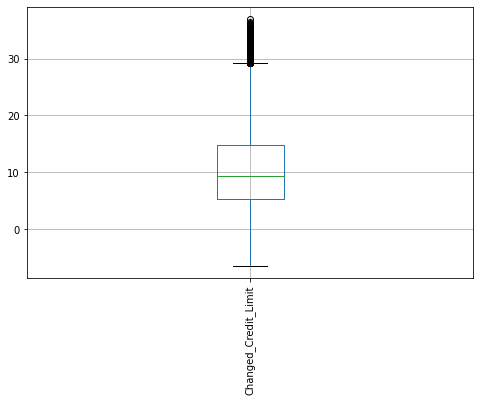



 Changed_Credit_Limit -Despues
count    100000.000000
mean         10.199846
std           6.786516
min           0.000000
25%           4.970000
50%           9.250000
75%          14.660000
max          29.195000
Name: Changed_Credit_Limit, dtype: float64


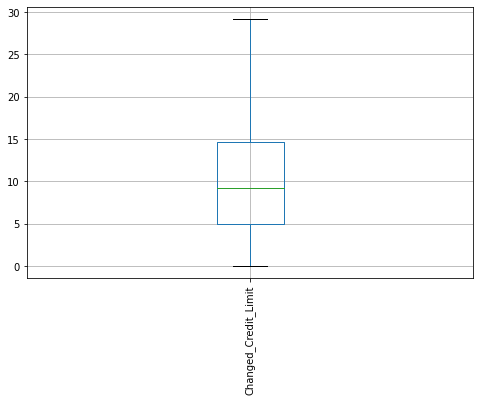

*******************************
3 

Amount_invested_monthly -Antes

count         95521
unique        91049
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object


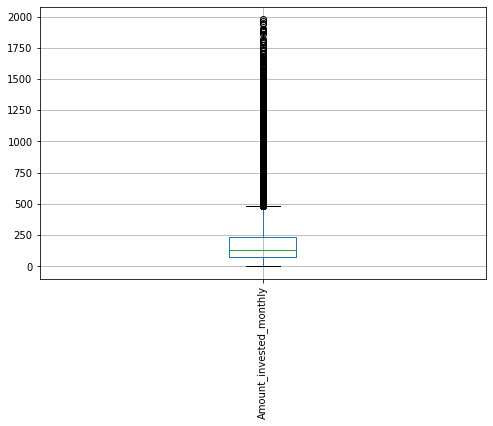



 Amount_invested_monthly -Despues
count    100000.000000
mean        202.519901
std         157.108666
min           0.000000
25%          77.017414
50%         143.127915
75%         304.765600
max         483.684497
Name: Amount_invested_monthly, dtype: float64


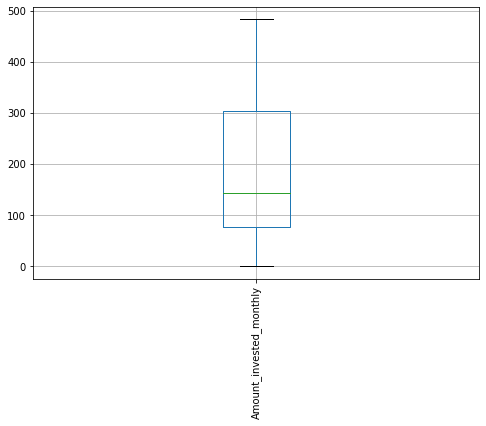

*******************************
4 

Num_of_Loan -Antes

count     100000
unique       434
top            3
freq       14386
Name: Num_of_Loan, dtype: object


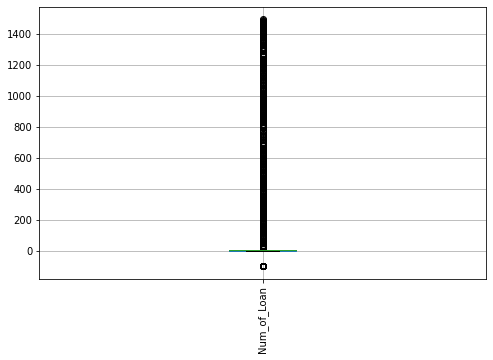



 Num_of_Loan -Despues
count    100000.000000
mean          3.405000
std           2.484926
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          11.000000
Name: Num_of_Loan, dtype: float64


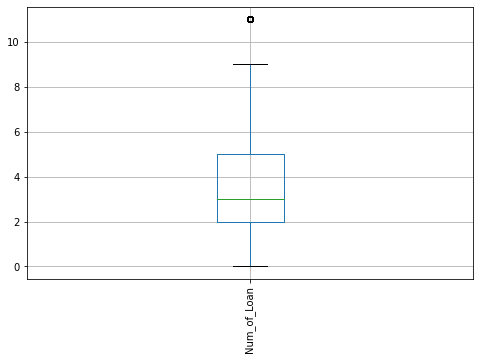

*******************************
5 

Age -Antes

count     100000
unique      1788
top           38
freq        2833
Name: Age, dtype: object


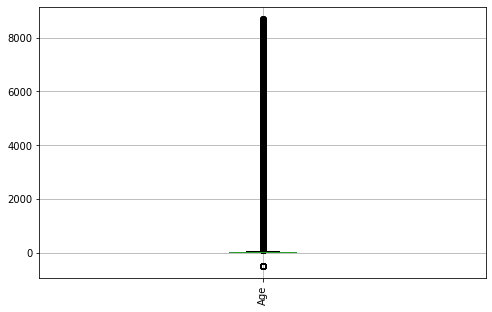



 Age -Despues
count    100000.000000
mean         33.896330
std          11.864593
min           0.000000
25%          25.000000
50%          34.000000
75%          42.000000
max          69.000000
Name: Age, dtype: float64


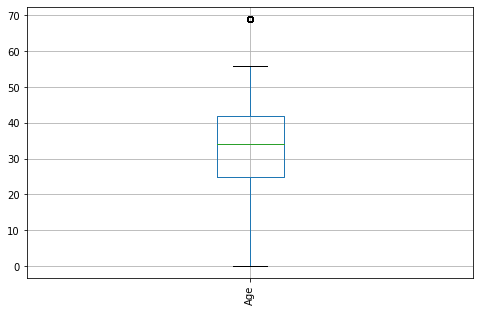

*******************************
6 

Credit_Utilization_Ratio -Antes

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


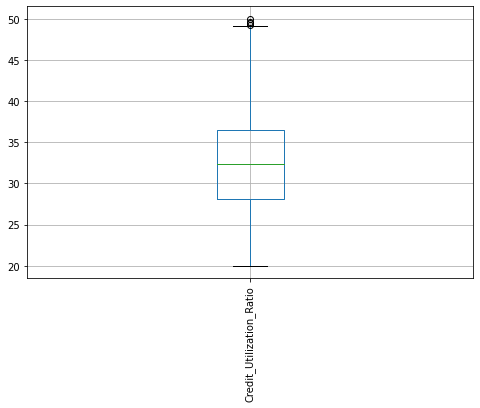



 Credit_Utilization_Ratio -Despues
count    100000.000000
mean         32.285156
std           5.116818
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          49.162808
Name: Credit_Utilization_Ratio, dtype: float64


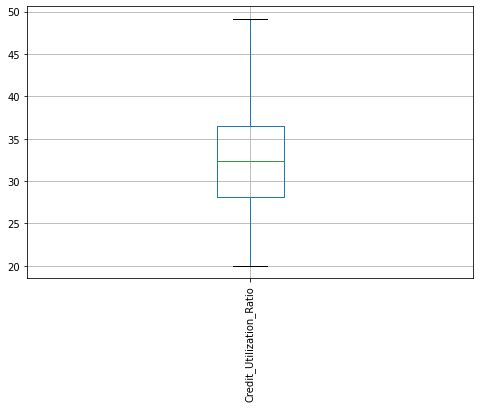

*******************************
7 

Interest_Rate -Antes

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64


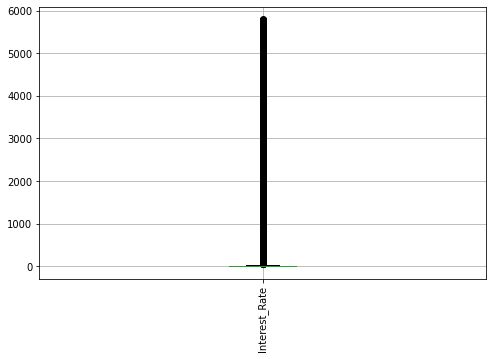



 Interest_Rate -Despues
count    100000.000000
mean         15.008950
std           9.263065
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max          38.000000
Name: Interest_Rate, dtype: float64


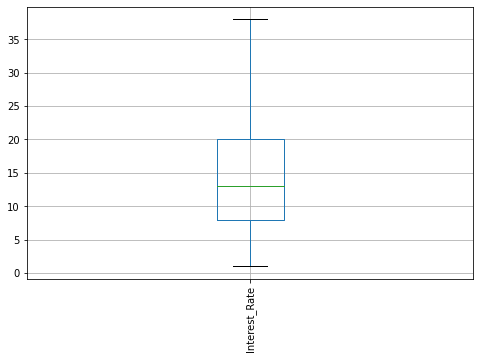

*******************************
8 

Delay_from_due_date -Antes

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


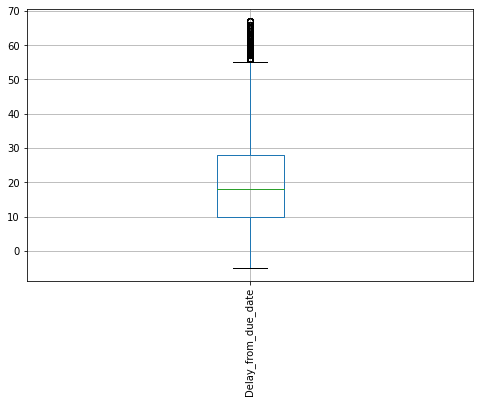



 Delay_from_due_date -Despues
count    100000.000000
mean         20.909770
std          14.406884
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          55.000000
Name: Delay_from_due_date, dtype: float64


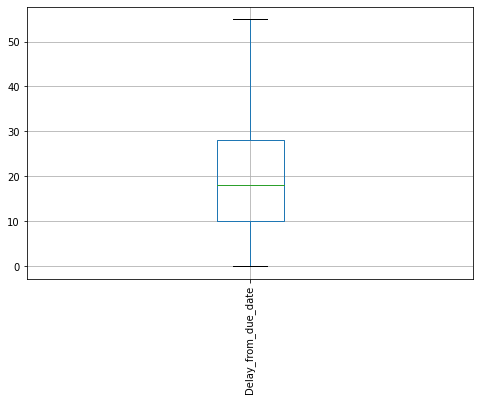

*******************************
9 

Monthly_Inhand_Salary -Antes

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


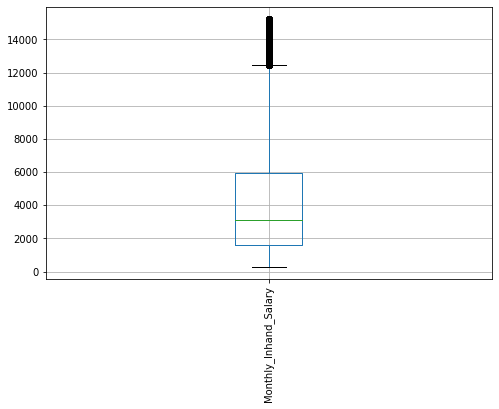



 Monthly_Inhand_Salary -Despues
count    100000.000000
mean       5410.563971
std        4117.569101
min         303.645417
25%        1792.084167
50%        3852.736667
75%        8595.465000
max       12455.268490
Name: Monthly_Inhand_Salary, dtype: float64


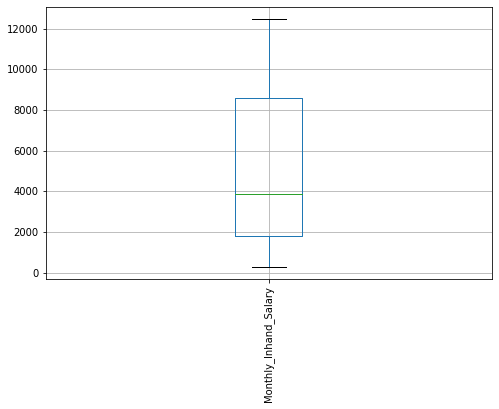

*******************************
10 

Total_EMI_per_month -Antes

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64


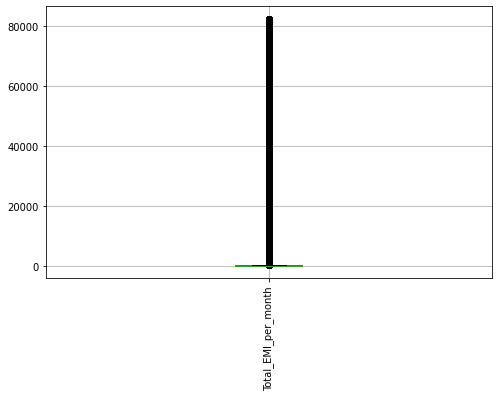



 Total_EMI_per_month -Despues
count    100000.000000
mean        108.054040
std         104.531770
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max         357.600632
Name: Total_EMI_per_month, dtype: float64


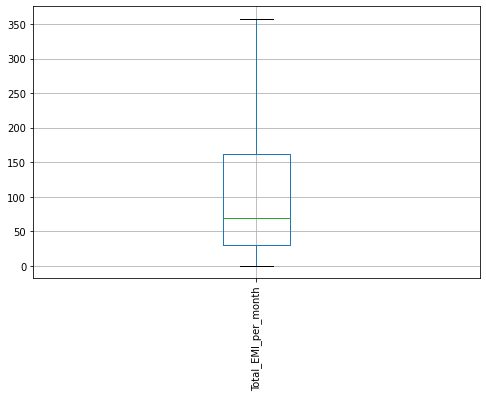

*******************************
11 

Num_of_Delayed_Payment -Antes

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object


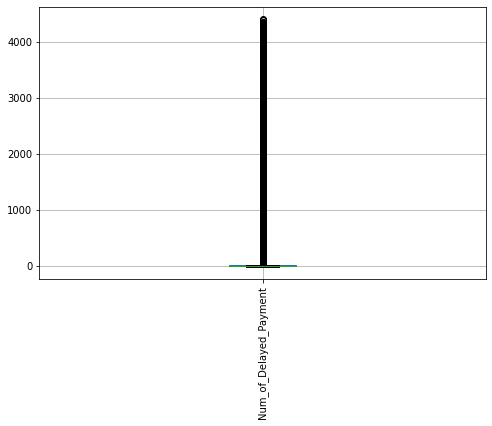



 Num_of_Delayed_Payment -Despues
count    100000.000000
mean         14.014015
std           6.356430
min           0.000000
25%           9.000000
50%          15.000000
75%          19.000000
max          31.500000
Name: Num_of_Delayed_Payment, dtype: float64


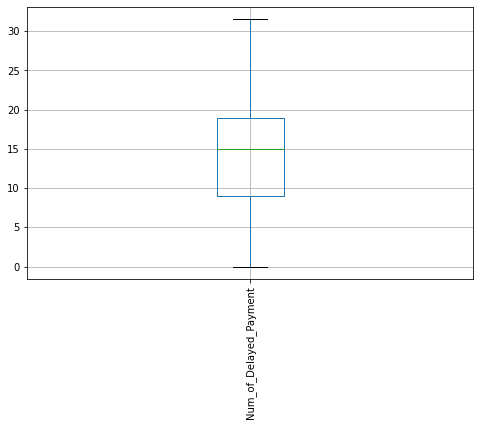

*******************************
12 

Num_Credit_Inquiries -Antes

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64


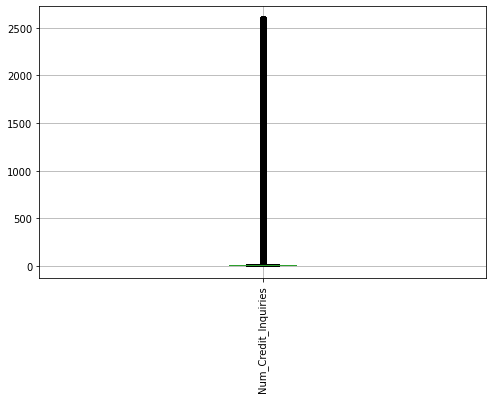



 Num_Credit_Inquiries -Despues
count    100000.000000
mean          5.947730
std           4.106622
min           0.000000
25%           3.000000
50%           5.000000
75%           9.000000
max          18.000000
Name: Num_Credit_Inquiries, dtype: float64


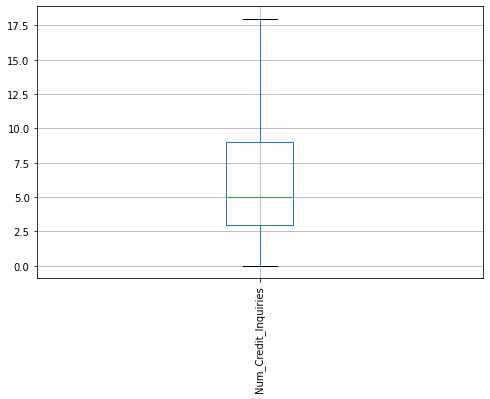

*******************************
13 

Num_Credit_Card -Antes

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64


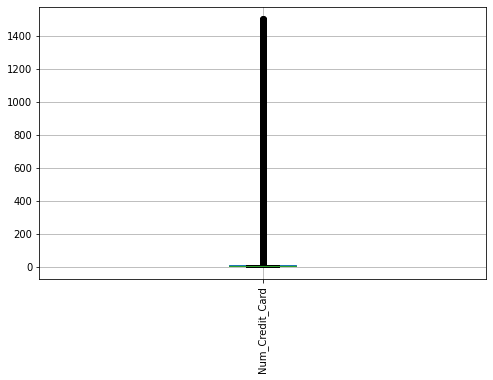



 Num_Credit_Card -Despues
count    100000.000000
mean          5.668825
std           2.229002
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.500000
Name: Num_Credit_Card, dtype: float64


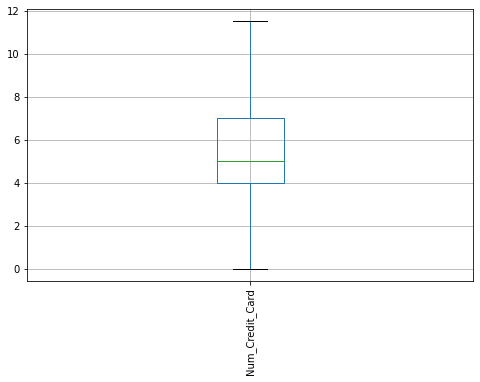

*******************************
14 

Outstanding_Debt -Antes

count      100000
unique      13178
top       1360.45
freq           24
Name: Outstanding_Debt, dtype: object


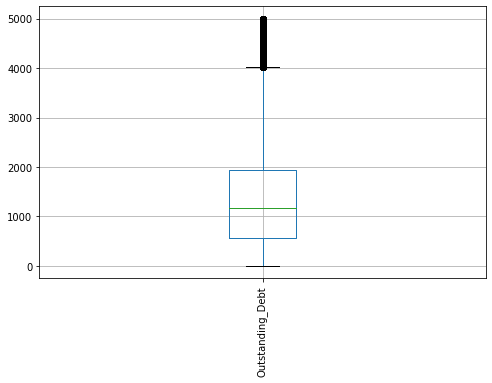



 Outstanding_Debt -Despues
count    100000.000000
mean       1426.874623
std        1112.578253
min           0.230000
25%         571.650000
50%        1175.880000
75%        1996.600000
max        4021.380000
Name: Outstanding_Debt, dtype: float64


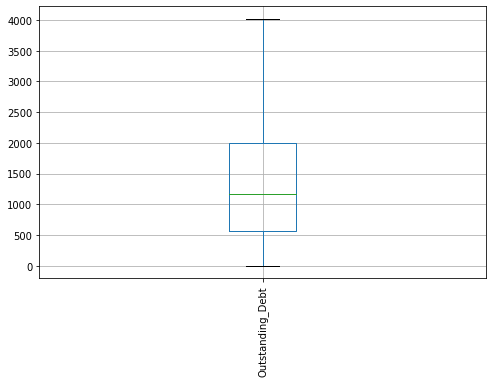

*******************************
15 

Monthly_Balance -Antes

count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object


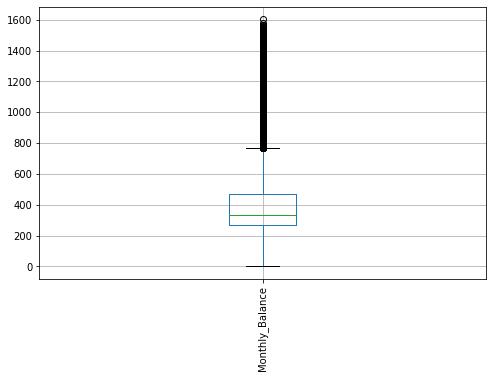



 Monthly_Balance -Despues
count    100000.000000
mean        392.960628
std         179.051011
min           0.007760
25%         270.913865
50%         338.672152
75%         478.580624
max         770.497401
Name: Monthly_Balance, dtype: float64


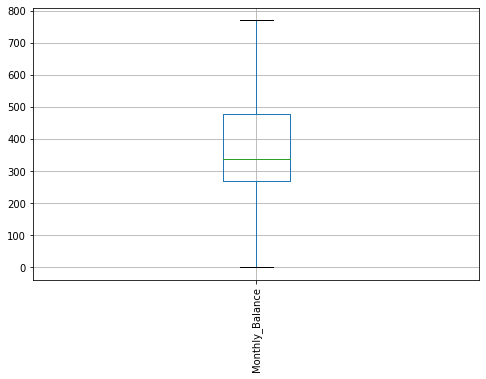

*******************************

 se procesaron:  15  variables!


In [ ]:
i=1
for colmas in colobject:
  print(i,'\n')
  print(colmas,'-Antes\n')
  print(df_full[colmas].describe())
  df_full[colmas]=pd.to_numeric(df_full[colmas], errors='coerce')
  plt.figure(figsize=(8,5))
  stud_bplt = df_full.boxplot(column = [colmas],  rot = 90, fontsize= '10', grid = True)
  stud_bplt.plot()
  plt.show()
  Q3colmas=df_full[colmas].quantile(q=.75)
  Q1colmas=df_full[colmas].quantile(q=.25)
  topemaxcolmas=(Q3colmas-Q1colmas)*1.5+Q3colmas
  topemincolmas=max(-(Q3colmas-Q1colmas)*1.5+Q1colmas,0)
  df_full.loc[df_full[colmas] > topemaxcolmas, colmas] = topemaxcolmas
  df_full.loc[df_full[colmas] < topemincolmas, colmas] = topemincolmas
  df_full[colmas].fillna(value = mode (df_full[colmas]), inplace=True)
  print('\n\n',colmas,'-Despues')
  print(df_full[colmas].describe())
  plt.figure(figsize=(8,5))
  stud_bplt = df_full.boxplot(column = [colmas],  rot = 90, fontsize= '10', grid = True)
  stud_bplt.plot()
  plt.show()
  i=i+1
  print('*******************************')
print('\n se procesaron: ',i-1,' variables!')
  


In [ ]:
#Ahora miramos como quedaron.
df_full[{'Age','Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio',  'Total_EMI_per_month',
       'Amount_invested_monthly','Monthly_Balance'}].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Num_Bank_Accounts,100000.0,5.47,2.72,0.00,3.00,6.00,7.00,13.00
Changed_Credit_Limit,100000.0,10.20,6.79,0.00,4.97,9.25,14.66,29.20
Amount_invested_monthly,100000.0,202.52,157.11,0.00,77.02,143.13,304.77,483.68
Num_of_Loan,100000.0,3.40,2.48,0.00,2.00,3.00,5.00,11.00
Age,100000.0,33.90,11.86,0.00,25.00,34.00,42.00,69.00
Credit_Utilization_Ratio,100000.0,32.29,5.12,20.00,28.05,32.31,36.50,49.16
Interest_Rate,100000.0,15.01,9.26,1.00,8.00,13.00,20.00,38.00
Delay_from_due_date,100000.0,20.91,14.41,0.00,10.00,18.00,28.00,55.00
Monthly_Inhand_Salary,100000.0,5410.56,4117.57,303.65,1792.08,3852.74,8595.46,12455.27
Total_EMI_per_month,100000.0,108.05,104.53,0.00,30.31,69.25,161.22,357.60


Ahora nos faltan tratar las siguientes columnas:
['ID', 'Customer_ID', 'Month', 'Name','SSN', 'Occupation',
       'Type_of_Loan','Credit_Mix','Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour','Credit_Score']

In [ ]:
#miramos un poco las columnas que nos faltan
df_full[{'ID', 'Customer_ID', 'Month', 'Name','SSN', 'Occupation', 'Type_of_Loan','Credit_Mix','Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour','Credit_Score'}].head()

,Type_of_Loan,Payment_Behaviour,ID,SSN,Payment_of_Min_Amount,Credit_Score,Credit_Mix,Customer_ID,Name,Month,Credit_History_Age,Occupation
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",High_spent_Small_value_payments,0x1602,821-00-0265,No,Good,_,CUS_0xd40,Aaron Maashoh,January,22 Years and 1 Months,Scientist
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Low_spent_Large_value_payments,0x1603,821-00-0265,No,Good,Good,CUS_0xd40,Aaron Maashoh,February,NaN,Scientist
2,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Low_spent_Medium_value_payments,0x1604,821-00-0265,No,Good,Good,CUS_0xd40,Aaron Maashoh,March,22 Years and 3 Months,Scientist
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Low_spent_Small_value_payments,0x1605,821-00-0265,No,Good,Good,CUS_0xd40,Aaron Maashoh,April,22 Years and 4 Months,Scientist
4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",High_spent_Medium_value_payments,0x1606,821-00-0265,No,Good,Good,CUS_0xd40,Aaron Maashoh,May,22 Years and 5 Months,Scientist


# Imputación (sensible) del resto de variables
['Customer_ID', 'Month','Occupation', 'Type_of_Loan','Credit_Mix','Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour','Credit_Score']

In [ ]:
df_full[{'Customer_ID', 'Month','Occupation', 'Type_of_Loan','Credit_Mix','Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour','Credit_Score'}].head()

,Payment_Behaviour,Payment_of_Min_Amount,Occupation,Credit_Score,Credit_Mix,Customer_ID,Month,Credit_History_Age,Type_of_Loan
0,High_spent_Small_value_payments,No,Scientist,Good,_,CUS_0xd40,January,22 Years and 1 Months,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,Low_spent_Large_value_payments,No,Scientist,Good,Good,CUS_0xd40,February,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,Low_spent_Medium_value_payments,No,Scientist,Good,Good,CUS_0xd40,March,22 Years and 3 Months,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,Low_spent_Small_value_payments,No,Scientist,Good,Good,CUS_0xd40,April,22 Years and 4 Months,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,High_spent_Medium_value_payments,No,Scientist,Good,Good,CUS_0xd40,May,22 Years and 5 Months,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


## Eliminación de las columnas que no usaremos

Eliminaremos las siguientes por carecer de sentido para el analisis 'ID','Name','SSN'

Por otro lado, las variables Variables: 'Type_of_Loan' y 'Credit_History_Age' Son variables de trabajo de texto bastante complejo al momento de este curso introductorio, por decisión unánime el alcance educativo del proyecto la descartaremos o dejaremos para otra instancia.

In [ ]:
 #Eliminamos las columnas ID, Name y SSN no son relevantes para nuestros estudio, o muy complejas para el alcance educativo del presente proyecto.
 df_full = df_full.drop(['ID', 'Name', 'SSN','Type_of_Loan','Credit_History_Age'],axis = 1)

In [ ]:
#Comprobamos la eliminación de las columnas deseadas
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

Ahora nos faltan tratar las siguientes columnas:
* **Customer_ID** La usaremos para sumarizar.
* **Month** La pasaremos a ordinal, y en base a ella elegiremos la forma de usar el algoritmo. (ok)
* **Occupation** La agruparemos por id, para luego pasarla a dummie.

* **Credit_Mix** Las pasamos a 0, 1 y -1 (ok).  Pasaremos a Dummies llegada la instancia.(falta)
* **Payment_of_Min_Amount** La podemos pasar a 0 y 1.(ok)
* **Credit_Score** Es nuestra variable target, la trabajaremos de 3 a 2 niveles. Ok.
* **Payment_Behaviour** Es un texto con varias clases, hay que trabajarla para armar algo así como dummies o clases.

## Adecuación de la columna Month

In [ ]:
df_full['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

Vemos que no hay nulos, la llevaremos a valores ordinales.

In [ ]:
df_full['Month'] = df_full['Month'].replace(to_replace="January", value=1, regex=True)
df_full['Month'] = df_full['Month'].replace(to_replace="February", value=2, regex=True)
df_full['Month'] = df_full['Month'].replace(to_replace="March", value=3, regex=True)
df_full['Month'] = df_full['Month'].replace(to_replace="April", value=4, regex=True)
df_full['Month'] = df_full['Month'].replace(to_replace="May", value=5, regex=True)
df_full['Month'] = df_full['Month'].replace(to_replace="June", value=6, regex=True)
df_full['Month'] = df_full['Month'].replace(to_replace="July", value=7, regex=True)
df_full['Month'] = df_full['Month'].replace(to_replace="August", value=8, regex=True)

In [ ]:
# la llevamos a integer
df_full['Month']=df_full['Month'].astype(int)


In [ ]:
#chequeamos la data
df_full['Month'].value_counts()

1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: Month, dtype: int64

## Adecuación de la variable Payment_of_min_Ammount

pasaremos el no a 0, el yes a 1 y el no data a -1 para asegurar diferencia. luego demos como la llevamos a dummies.

In [ ]:
df_full['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
df_full['Payment_of_Min_Amount'] = df_full['Payment_of_Min_Amount'].replace(to_replace="No", value=0, regex=True)
df_full['Payment_of_Min_Amount'] = df_full['Payment_of_Min_Amount'].replace(to_replace="Yes", value=1, regex=True)
df_full['Payment_of_Min_Amount'] = df_full['Payment_of_Min_Amount'].replace(to_replace="NM", value=-1, regex=True)

In [ ]:
df_full['Payment_of_Min_Amount']=df_full['Payment_of_Min_Amount'].astype(int)

In [ ]:
df_full['Payment_of_Min_Amount'].value_counts()

 1    52326
 0    35667
-1    12007
Name: Payment_of_Min_Amount, dtype: int64

# Acondicionando Variable de Salida: Credit_Score
(Tres valores posibles: Poor, Good & Standard) la categoría standard se convirtió en Good, y se volvió númérica **Poor=0 & Good=1 & Standard=2**

In [ ]:
#vemos los valores distintos
df_full['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
#Tenemos 3 valores en la variable de salida les asignamos valores númericos 0,1 y 2
df_full['Credit_Score'] = df_full['Credit_Score'].replace(to_replace="Poor", value=0, regex=True) 
df_full['Credit_Score'] = df_full['Credit_Score'].replace(to_replace="Good", value=1, regex=True) 
df_full['Credit_Score'] = df_full['Credit_Score'].replace(to_replace="Standard", value=2, regex=True) 

In [ ]:
df_full['Credit_Score']=df_full['Credit_Score'].astype(int)

In [ ]:
df_full['Credit_Score'].value_counts()

2    53174
0    28998
1    17828
Name: Credit_Score, dtype: int64

# Sumarización de la variables categóricas "Occupation", "Credit_Mix" y la variable de salida "Credit_score"

Siendo que los clientes aparecen varias veces, y con valores a veces erróneos recurriremos a una medida de tendencia central para sumarizarlas.
La agruparemos por el valor mas probable (moda). Luego la usaremos para joinear a la tabla de variables numéricas también sumarizadas.

In [ ]:
df_categoricasyflag=df_full.groupby(['Customer_ID'])['Occupation','Credit_Mix','Credit_Score'].agg(
    lambda x: pd.Series.mode(x)[0])
df_categoricasyflag

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Occupation,Credit_Mix,Credit_Score
Customer_ID,,,
CUS_0x1000,Lawyer,Bad,0
CUS_0x1009,Mechanic,Standard,2
CUS_0x100b,Media_Manager,Good,0
CUS_0x1011,Doctor,Standard,2
CUS_0x1013,Mechanic,Good,2
...,...,...,...
CUS_0xff3,Scientist,Good,2
CUS_0xff4,Entrepreneur,Standard,2
CUS_0xff6,Doctor,Good,2


In [ ]:
df_categoricasyflag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, CUS_0x1000 to CUS_0xffd
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Occupation    12500 non-null  object
 1   Credit_Mix    12500 non-null  object
 2   Credit_Score  12500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 390.6+ KB


In [ ]:
#vemos como quedo.
df_categoricasyflag.Credit_Mix.value_counts()

Standard    5663
Good        3767
Bad         2939
_            131
Name: Credit_Mix, dtype: int64

In [ ]:
#vemos como quedo.
df_categoricasyflag.Occupation.value_counts()

Lawyer           887
Engineer         858
Architect        853
Mechanic         847
Accountant       843
Scientist        843
Developer        840
Media_Manager    839
Teacher          834
Entrepreneur     831
Doctor           821
Journalist       817
Manager          804
Musician         794
Writer           788
_______            1
Name: Occupation, dtype: int64

In [ ]:
#vemos como quedo.
df_categoricasyflag.Credit_Score.value_counts()

2    5832
0    4162
1    2506
Name: Credit_Score, dtype: int64

In [ ]:
len(df_categoricasyflag)

12500

# **<<< Termina Limpieza y trabajo de variables >>>**

# **Agrupación:** Utilizando Customer_ID para sumarizar la información (existen varios registros por cliente)


En primera instancia, resumiremos las variables numérica para cada customer ID.

In [ ]:
#vamos a listar las variables numéricas
numerical_cols = [cname for cname in df_full.columns if df_full[cname].dtype in ['float64','uint8','int64']]
numerical_cols

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Score']

Agruparemos las variables numéricas por su mediana. para corregir posibles errores y reducir el set a un registro por cliente.

In [ ]:
# agrupamos las numérica por su mediana.
df_agrupado_median = df_full.groupby("Customer_ID")[numerical_cols].median()

In [ ]:
#le sacaremos la variable numérica creditmix pues la sumarizaremos con la moda, tampoco tiene sentido la variable month.
df_agrupado_median = df_agrupado_median.drop(columns=['Credit_Score','Month'])
df_agrupado_median

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Customer_ID,,,,,,,,,,,,,,,,,
CUS_0x1000,17.5,30.63,2706.161667,6.0,5.0,27.0,2.0,55.0,25.0,1.63,11.0,1562.91,32.586795,1.0,42.941090,145.467484,340.080534
CUS_0x1009,26.0,52.31,4250.390000,6.0,5.0,17.0,4.0,8.0,18.0,9.73,3.0,202.68,29.416507,1.0,108.366467,152.968494,417.869641
CUS_0x100b,18.5,113.78,9549.782500,1.0,4.0,1.0,0.0,14.0,7.0,11.34,1.0,1030.20,33.991659,0.0,0.000000,483.684497,770.497401
CUS_0x1011,44.0,58.92,5208.872500,3.0,3.0,17.0,3.0,27.0,15.0,14.42,7.0,473.14,27.939861,1.0,123.434939,413.774336,263.677975
CUS_0x1013,44.0,98.62,7962.415000,3.0,3.0,6.0,3.0,12.0,9.0,1.33,3.0,1233.51,30.585673,0.0,228.018084,320.088813,513.134603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS_0xff3,55.0,17.03,1176.398750,0.0,6.0,2.0,3.0,13.0,9.0,6.86,5.0,1229.08,33.791037,0.0,33.299764,82.828925,280.587085
CUS_0xff4,37.0,25.55,2415.855000,8.0,7.0,14.0,5.0,16.0,13.0,7.83,5.0,758.44,32.342833,1.0,101.328637,110.758490,303.249291
CUS_0xff6,19.0,117.64,9727.326667,5.0,6.0,1.0,2.0,1.0,4.0,10.40,2.0,338.30,34.233114,0.0,126.638453,483.684497,745.113422


In [ ]:
#verificamos que no haya nnulos
df_agrupado_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, CUS_0x1000 to CUS_0xffd
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Annual_Income             12500 non-null  float64
 2   Monthly_Inhand_Salary     12500 non-null  float64
 3   Num_Bank_Accounts         12500 non-null  float64
 4   Num_Credit_Card           12500 non-null  float64
 5   Interest_Rate             12500 non-null  float64
 6   Num_of_Loan               12500 non-null  float64
 7   Delay_from_due_date       12500 non-null  float64
 8   Num_of_Delayed_Payment    12500 non-null  float64
 9   Changed_Credit_Limit      12500 non-null  float64
 10  Num_Credit_Inquiries      12500 non-null  float64
 11  Outstanding_Debt          12500 non-null  float64
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Payment_of_Min_Amount     12500 non-null  float64
 14

# Merge de categóricas y numéricas sumarizadas

Aquí juntaremos las categóricas y las numéricas en un solo dataframe.

In [ ]:
#recordemos el df de las categóricas
df_categoricasyflag.head()

,Occupation,Credit_Mix,Credit_Score
Customer_ID,,,
CUS_0x1000,Lawyer,Bad,0
CUS_0x1009,Mechanic,Standard,2
CUS_0x100b,Media_Manager,Good,0
CUS_0x1011,Doctor,Standard,2
CUS_0x1013,Mechanic,Good,2


In [ ]:
# y el Df de las numéricas
df_agrupado_median.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Customer_ID,,,,,,,,,,,,,,,,,
CUS_0x1000,17.5,30.63,2706.161667,6.0,5.0,27.0,2.0,55.0,25.0,1.63,11.0,1562.91,32.586795,1.0,42.941090,145.467484,340.080534
CUS_0x1009,26.0,52.31,4250.390000,6.0,5.0,17.0,4.0,8.0,18.0,9.73,3.0,202.68,29.416507,1.0,108.366467,152.968494,417.869641
CUS_0x100b,18.5,113.78,9549.782500,1.0,4.0,1.0,0.0,14.0,7.0,11.34,1.0,1030.20,33.991659,0.0,0.000000,483.684497,770.497401
CUS_0x1011,44.0,58.92,5208.872500,3.0,3.0,17.0,3.0,27.0,15.0,14.42,7.0,473.14,27.939861,1.0,123.434939,413.774336,263.677975
CUS_0x1013,44.0,98.62,7962.415000,3.0,3.0,6.0,3.0,12.0,9.0,1.33,3.0,1233.51,30.585673,0.0,228.018084,320.088813,513.134603


In [ ]:
#Las joinearemos por el customer_id.
df_full_ag = pd.merge(df_agrupado_median, df_categoricasyflag, on='Customer_ID', how='inner')

In [ ]:
#lo miramos un poco nuevamente.
df_full_ag.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, CUS_0x1000 to CUS_0xffd
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Annual_Income             12500 non-null  float64
 2   Monthly_Inhand_Salary     12500 non-null  float64
 3   Num_Bank_Accounts         12500 non-null  float64
 4   Num_Credit_Card           12500 non-null  float64
 5   Interest_Rate             12500 non-null  float64
 6   Num_of_Loan               12500 non-null  float64
 7   Delay_from_due_date       12500 non-null  float64
 8   Num_of_Delayed_Payment    12500 non-null  float64
 9   Changed_Credit_Limit      12500 non-null  float64
 10  Num_Credit_Inquiries      12500 non-null  float64
 11  Outstanding_Debt          12500 non-null  float64
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Payment_of_Min_Amount     12500 non-null  float64
 14

# Analisis Multivariado

Luego de la limpieza y de manera previa al modelado, comenzamos a realizar un analisis multivariado del Dataset sumarizado, si bien sabemos que nuestro target es "Credit_Score", nos servirá para poder avanzar en el entrenamiento de nuestro algoritmo, y luego para calcular la probabilidad de otorgamiento de credito

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Annual_Income'),
 Text(2.5, 0, 'Monthly_Inhand_Salary'),
 Text(3.5, 0, 'Num_Bank_Accounts'),
 Text(4.5, 0, 'Num_Credit_Card'),
 Text(5.5, 0, 'Interest_Rate'),
 Text(6.5, 0, 'Num_of_Loan'),
 Text(7.5, 0, 'Delay_from_due_date'),
 Text(8.5, 0, 'Num_of_Delayed_Payment'),
 Text(9.5, 0, 'Changed_Credit_Limit'),
 Text(10.5, 0, 'Num_Credit_Inquiries'),
 Text(11.5, 0, 'Outstanding_Debt'),
 Text(12.5, 0, 'Credit_Utilization_Ratio'),
 Text(13.5, 0, 'Payment_of_Min_Amount'),
 Text(14.5, 0, 'Total_EMI_per_month'),
 Text(15.5, 0, 'Amount_invested_monthly'),
 Text(16.5, 0, 'Monthly_Balance'),
 Text(17.5, 0, 'Credit_Score')]

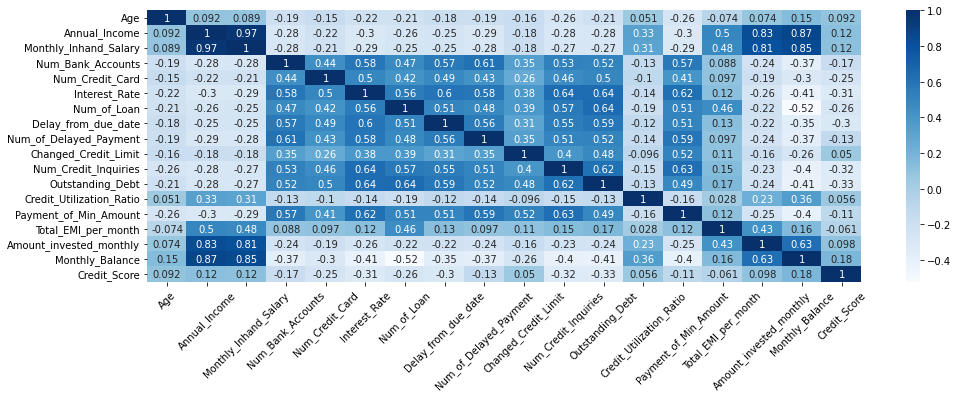

In [ ]:
#lo primero queharemos es un mapa de calor, para verificar si hay variables con correlación demasiado alta de manera de sacarlas de la etapa de modelado.
#recordemos que ciertos algoritmos pueden performar peor cuando hay alta correlación.
plt.figure(figsize = (16,5))
corr = df_full_ag.corr()
chart = sns.heatmap(corr, annot = True, cmap='Blues')
#Rotamos el texto de las eitquetas del eje X en 45 grados
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [ ]:
#Identificamos las variables con valores nulos
df_full_ag.isna().sum().sort_values(ascending = False)

Age                         0
Annual_Income               0
Credit_Mix                  0
Occupation                  0
Monthly_Balance             0
Amount_invested_monthly     0
Total_EMI_per_month         0
Payment_of_Min_Amount       0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
Num_Credit_Inquiries        0
Changed_Credit_Limit        0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Num_of_Loan                 0
Interest_Rate               0
Num_Credit_Card             0
Num_Bank_Accounts           0
Monthly_Inhand_Salary       0
Credit_Score                0
dtype: int64

In [ ]:
#Finalmente utilizamos para mayor obtención de información y toma de decisiones sobre los algoritmos a utilziar, un Reporte de profile
#profile = pandas_profiling.ProfileReport(df_full_ag)
#profile
#Como el profiling se usa de manera preliminar y ocupa mucho espacio, lo dejaremos comentado

Algunas conclusiones preliminares viendo un poco el profiling son:

A) Estadisticas:
  - Contamos con un  24% de variables Categoricas(5) y un 76% de variables númericas(16) de un total de 21 variables.
  - No hay missings devido a el trabajo de sumarización y limpieza.

B) Correlaciones
- Visualizamos un distintos porcentajes de variables que podrian servir como entrenamiento del modelo

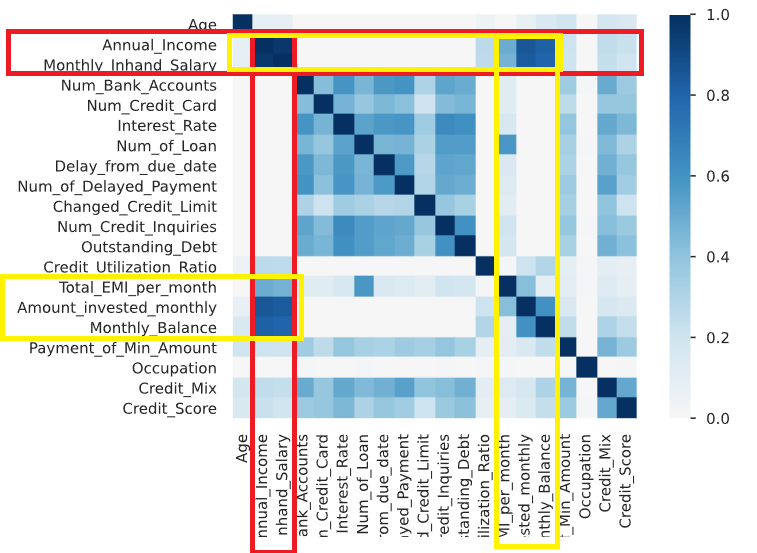


C) Interacciones
Tomando las correlaciones, creemos que las mejores opciones de interacción son 
- 'Monthly_Inhand_Salary' vs 'Annual_Income'
- Total Emi, Ammount Invested y Montly Balance vs anual Income
  

##Realizamos un analisis bivariado de las interacciones anteriormente mencionadas

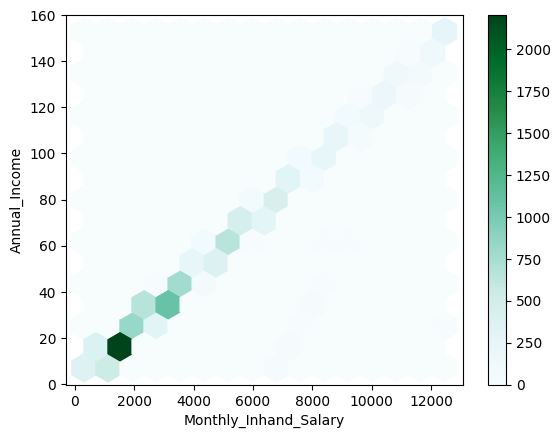

In [ ]:
#'Monthly_Inhand_Salary' vs 'Annual_Income'
df_full_ag.plot.hexbin(x='Monthly_Inhand_Salary', y='Annual_Income',gridsize=15)


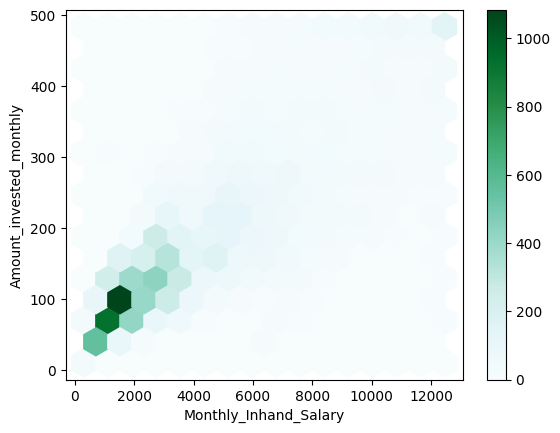

In [ ]:
#'Monthly_Inhand_Salary' vs 'Amount_invested_monthly'
df_full_ag.plot.hexbin(x='Monthly_Inhand_Salary', y='Amount_invested_monthly',gridsize=15)

Simplificaremos el data frame eliminando las variables altamente correlacionadas, y verificadas gráficamente.

In [ ]:
df_full_ag=df_full_ag.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'],axis=1)

In [ ]:
df_full_ag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, CUS_0x1000 to CUS_0xffd
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Annual_Income             12500 non-null  float64
 2   Num_Bank_Accounts         12500 non-null  float64
 3   Num_Credit_Card           12500 non-null  float64
 4   Interest_Rate             12500 non-null  float64
 5   Num_of_Loan               12500 non-null  float64
 6   Delay_from_due_date       12500 non-null  float64
 7   Num_of_Delayed_Payment    12500 non-null  float64
 8   Changed_Credit_Limit      12500 non-null  float64
 9   Num_Credit_Inquiries      12500 non-null  float64
 10  Outstanding_Debt          12500 non-null  float64
 11  Credit_Utilization_Ratio  12500 non-null  float64
 12  Payment_of_Min_Amount     12500 non-null  float64
 13  Total_EMI_per_month       12500 non-null  float64
 14

# Agregado de variables dummies a las categóricas

In [ ]:
#hacemos una copia del dataframe y le agregamos las dummies a las variables categóricas, pevio a modelarlas
df_full_ag_dum = df_full_ag
df_full_ag_dum = pd.get_dummies(df_full_ag_dum, columns=['Occupation'], prefix='occ')
df_full_ag_dum = pd.get_dummies(df_full_ag_dum, columns=['Credit_Mix'], prefix='CM')
df_full_ag_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, CUS_0x1000 to CUS_0xffd
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  float64
 1   Annual_Income             12500 non-null  float64
 2   Num_Bank_Accounts         12500 non-null  float64
 3   Num_Credit_Card           12500 non-null  float64
 4   Interest_Rate             12500 non-null  float64
 5   Num_of_Loan               12500 non-null  float64
 6   Delay_from_due_date       12500 non-null  float64
 7   Num_of_Delayed_Payment    12500 non-null  float64
 8   Changed_Credit_Limit      12500 non-null  float64
 9   Num_Credit_Inquiries      12500 non-null  float64
 10  Outstanding_Debt          12500 non-null  float64
 11  Credit_Utilization_Ratio  12500 non-null  float64
 12  Payment_of_Min_Amount     12500 non-null  float64
 13  Total_EMI_per_month       12500 non-null  float64
 14

In [ ]:
#Borramos las de las rayitas por ser datos impuros
df_full_ag_dum = df_full_ag_dum.drop(columns=['occ________','CM__'])
df_full_ag_dum

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,occ_Manager,occ_Mechanic,occ_Media_Manager,occ_Musician,occ_Scientist,occ_Teacher,occ_Writer,CM_Bad,CM_Good,CM_Standard
Customer_ID,,,,,,,,,,,,,,,,,,,,,
CUS_0x1000,17.5,30.63,6.0,5.0,27.0,2.0,55.0,25.0,1.63,11.0,...,0,0,0,0,0,0,0,1,0,0
CUS_0x1009,26.0,52.31,6.0,5.0,17.0,4.0,8.0,18.0,9.73,3.0,...,0,1,0,0,0,0,0,0,0,1
CUS_0x100b,18.5,113.78,1.0,4.0,1.0,0.0,14.0,7.0,11.34,1.0,...,0,0,1,0,0,0,0,0,1,0
CUS_0x1011,44.0,58.92,3.0,3.0,17.0,3.0,27.0,15.0,14.42,7.0,...,0,0,0,0,0,0,0,0,0,1
CUS_0x1013,44.0,98.62,3.0,3.0,6.0,3.0,12.0,9.0,1.33,3.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS_0xff3,55.0,17.03,0.0,6.0,2.0,3.0,13.0,9.0,6.86,5.0,...,0,0,0,0,1,0,0,0,1,0
CUS_0xff4,37.0,25.55,8.0,7.0,14.0,5.0,16.0,13.0,7.83,5.0,...,0,0,0,0,0,0,0,0,0,1
CUS_0xff6,19.0,117.64,5.0,6.0,1.0,2.0,1.0,4.0,10.40,2.0,...,0,0,0,0,0,0,0,0,1,0


# Algoritmos de Clasificación

> A continuación presentaremos distintos modelos y sus pro/cons.


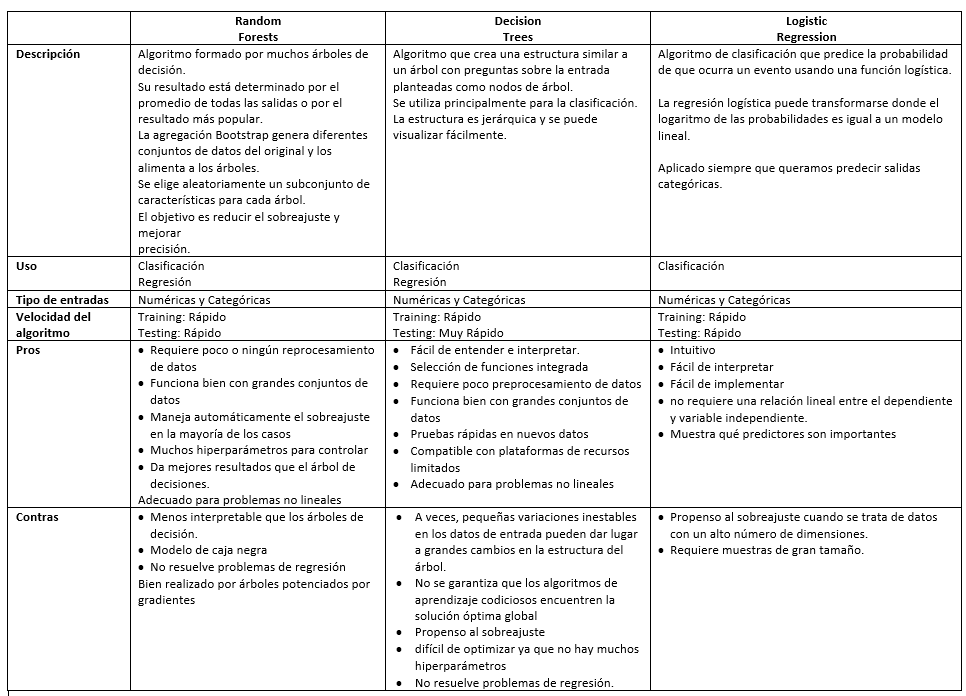

In [ ]:
#Importamos las librerías a utilizar
# ==============================================================================
#RF
# ==============================================================================
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ==============================================================================
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Función para crear las matrices de confusión y no repetir el código.
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Poor', 'Good', 'Standard'], yticklabels=['Poor', 'Good', 'Standard'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Random Forest

In [ ]:
#Random Forest
#Seperamos en X e y
#Preparación de datos para el modelado
#Eliminando Variable de Salida y Variables Categóricas que No agregan valor, para una segunda iteración del modelo, posiblemente incluiremos alguna después de convertirlas a numéricas y quizás de las que ya incluimos sea necesario eliminar alguna.
X = df_full_ag_dum.drop(['Credit_Score'], axis=1) 
y = df_full_ag_dum.Credit_Score.astype('int') #Defino el Target

In [ ]:
#Separamos en train y test y nos quedamos 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
 #Creamos el modelo
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=70,criterion='gini')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=70, random_state=42)

In [ ]:
# Obtenemos predicciones
y_pred= clf.predict(X_test)

In [ ]:
#Imprimimos las predicciones
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1385
           1       0.63      0.84      0.72       842
           2       0.83      0.67      0.74      1898

    accuracy                           0.75      4125
   macro avg       0.74      0.77      0.75      4125
weighted avg       0.76      0.75      0.75      4125



In [ ]:
clf.feature_importances_

array([0.00496614, 0.01138643, 0.0273229 , 0.04230736, 0.14707344,
       0.016486  , 0.06963059, 0.03716149, 0.04204068, 0.05362096,
       0.17258551, 0.0044061 , 0.03668574, 0.00876461, 0.0129336 ,
       0.00023068, 0.00032645, 0.00029652, 0.00032389, 0.00021203,
       0.00033431, 0.00032088, 0.00041468, 0.00034451, 0.00020814,
       0.00022402, 0.00050865, 0.00022304, 0.00026878, 0.00037065,
       0.04999387, 0.12119587, 0.13683147])

Text(0.5, 0, 'Random Forest Feature Importance')

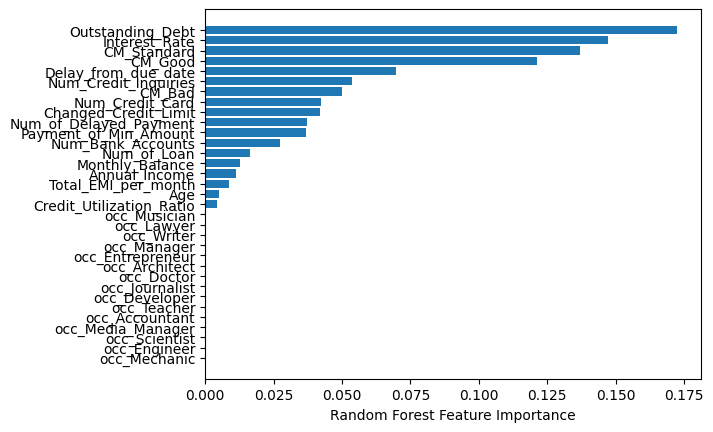

In [ ]:
#Imprimimos un grafico de barras con las variables mas importantes (Random Forest)
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1385
           1       0.64      0.79      0.71       842
           2       0.80      0.73      0.76      1898

    accuracy                           0.75      4125
   macro avg       0.74      0.76      0.75      4125
weighted avg       0.76      0.75      0.75      4125



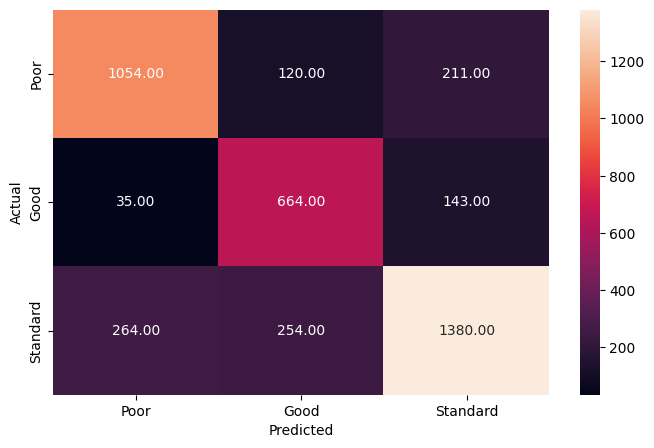

In [ ]:
# Comprobación del performance en los datos de PRUEBA (Random Forest)
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

## Logistic Regression

In [ ]:
#Preparación de datos para el modelado
#Eliminando Variable de Salida y Variables Categóricas que No agregan valor, para una segunda iteración del modelo, posiblemente incluiremos alguna después de convertirlas a numéricas y quizás de las que ya incluimos sea necesario eliminar alguna.
X = df_full_ag_dum.drop(['Credit_Score'], axis=1)

In [ ]:
#Defino el Target
Y = df_full_ag_dum.Credit_Score.astype('int') #Defino el Target
Y

Customer_ID
CUS_0x1000    0
CUS_0x1009    2
CUS_0x100b    0
CUS_0x1011    2
CUS_0x1013    2
             ..
CUS_0xff3     2
CUS_0xff4     2
CUS_0xff6     2
CUS_0xffc     0
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

In [ ]:
# Dividir los datos en un 70 % para entrenamiento y un 30 % para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,stratify=Y, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (8375, 33)
Shape of test set :  (4125, 33)
Percentage of classes in training set:
2    0.466507
0    0.333015
1    0.200478
Name: Credit_Score, dtype: float64
Percentage of classes in test set:
2    0.466667
0    0.332848
1    0.200485
Name: Credit_Score, dtype: float64


In [ ]:
# Ajuste del modelo de regresión logística
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      2789
           1       0.59      0.52      0.55      1679
           2       0.64      0.75      0.69      3907

    accuracy                           0.66      8375
   macro avg       0.66      0.63      0.64      8375
weighted avg       0.66      0.66      0.66      8375



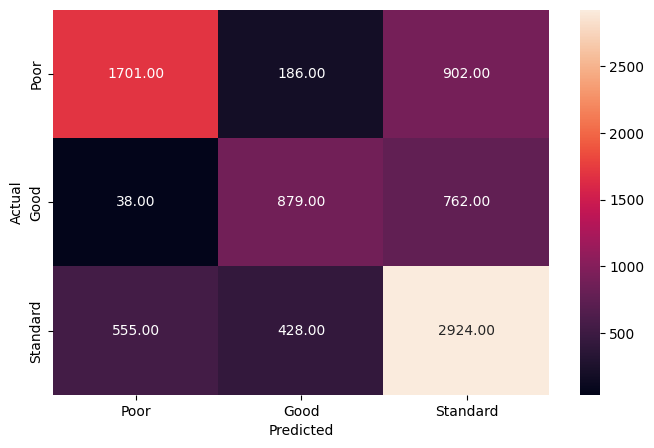

In [ ]:
# Comprobación del performance en los datos de ENTRENAMIENTO (Regresión Logística)
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1373
           1       0.59      0.51      0.55       827
           2       0.63      0.75      0.68      1925

    accuracy                           0.65      4125
   macro avg       0.66      0.62      0.63      4125
weighted avg       0.66      0.65      0.65      4125



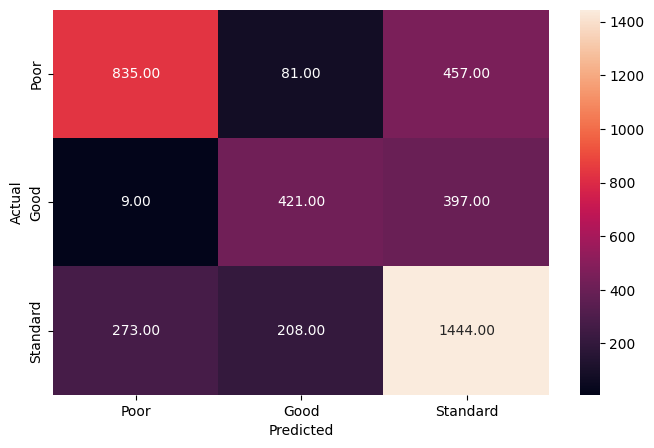

In [ ]:
# Comprobación del rendimiento en el conjunto de DATOS DE PRUEBA (Regresión Logística)
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

accuracy: 0.618
log loss: 0.822
              precision    recall  f1-score   support

           0       0.73      0.57      0.64      1374
           1       0.51      0.34      0.41       800
           2       0.59      0.77      0.67      1951

    accuracy                           0.62      4125
   macro avg       0.61      0.56      0.57      4125
weighted avg       0.62      0.62      0.61      4125

[[ 777   13  270]
 [  84  275  185]
 [ 513  512 1496]]


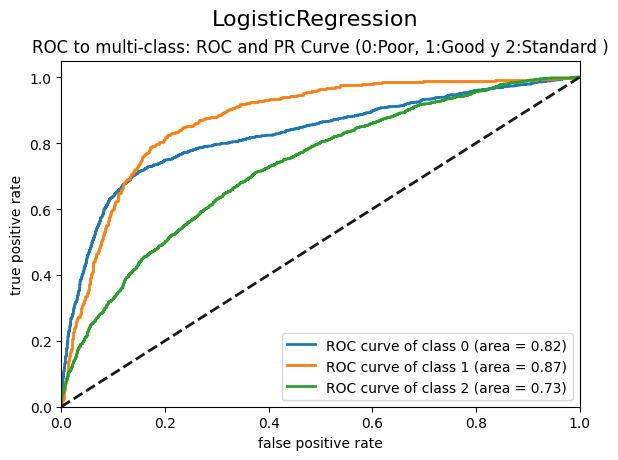

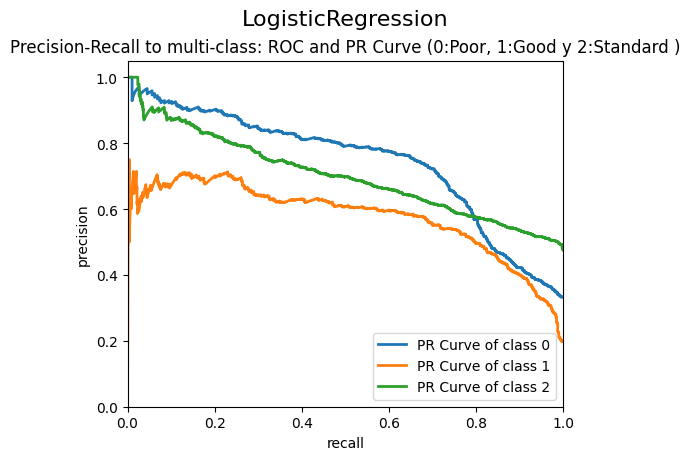

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc, log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
import seaborn as sn
from sklearn.svm import SVC
from xgboost import XGBClassifier

def plot_roc_curve(X, y, _classifier, caller):
    algor_name = type(_classifier).__name__   
      # poner en varias columnas OneVsRestClassifier
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.values.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]
    # separación train/test 
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size = 0.33, random_state = 5)
    # Para cada clasificador, la clase se compara con todas las demás clases.
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)
     # ROC Curve apra cada clase
    fig = plt.figure()
    plt.style.use('default')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('ROC to multi-class: ' + caller)
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_precision_recall_curve(X, y, _classifier, caller):
    algor_name = type(_classifier).__name__    
    # poner en varias columnas OneVsRestClassifier
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.values.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]
    # separación train/test 
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size = 0.3, random_state = 5)
    # Para cada clasificador, la clase se compara con todas las demás clases.
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)
    
    # ROC Curve apra cada clase
    fig = plt.figure()
    plt.style.use('default')
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_proba[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='PR Curve of class {}'.format(i))
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('Precision-Recall to multi-class: ' + caller)
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_confusion_matrix(cfm, y_test, caller, algor_name):
    #matriz de confusion
    df_cm = pd.DataFrame(cfm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    
    # fig = plt.figure()
    # plt.title('Confusion Matrix: ' + caller, fontsize=14)
    # plt.suptitle(algor_name, fontsize=16)
    # plt.style.use('default')
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    # sn.set(font_scale=1.4)
    # sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 10})
    # plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

clf = LogisticRegression(max_iter=50, solver = 'lbfgs')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

algor_name = type(clf).__name__
caller = 'ROC and PR Curve (0:Poor, 1:Good y 2:Standard )'
rpt = classification_report(y_test, y_pred)
cfm = confusion_matrix(y_pred, y_test)
print("accuracy: {}".format(round(accuracy_score(y_test, y_pred), 3)))
print("log loss: {}".format(round(log_loss(y_test, y_proba), 3)))
print(rpt)
print(cfm)


try:
    plot_confusion_matrix(cfm, y_test, caller, algor_name)
except ValueError:
    print("Error: cannot plot the confusion matrix.")

if not isinstance(clf, (XGBClassifier, SVC)):
    try:
        plot_roc_curve(X, y, clf, caller)
    except ValueError:
        print("Error: cannot plot the ROC Curve.")
        
    try:
        plot_precision_recall_curve(X, y, clf, caller)        
    except ValueError:
        print("Error: cannot plot the PR Curve.")


Las curvas ROC deben usarse cuando hay aproximadamente el mismo número de observaciones para cada clase.

En comparación con la curva ideal, observamos que un comportamiento similar de nuestras clases, especialmente de la clase good. (Gráfica calculada en el punto anterior)


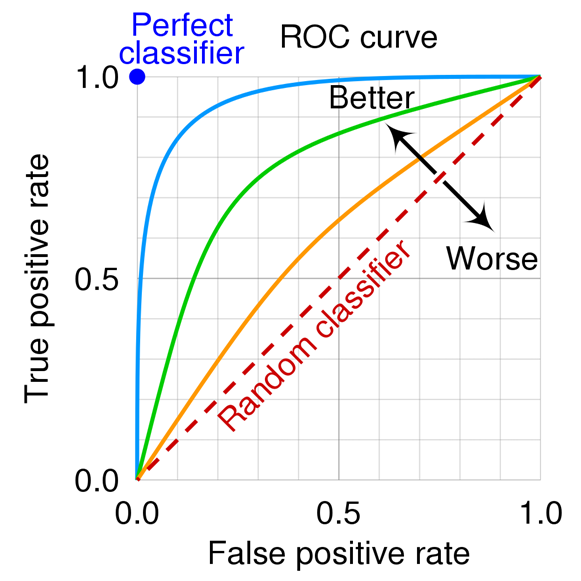


Las curvas de recuperación de precisión (PR), deben usarse cuando hay un desequilibrio de clase moderado a grande.

En comparación con la curva ideal observamos un buen comportamiento de nuestras curvas especialmente de la clase good. (Gráfica calculada en el punto anterior)


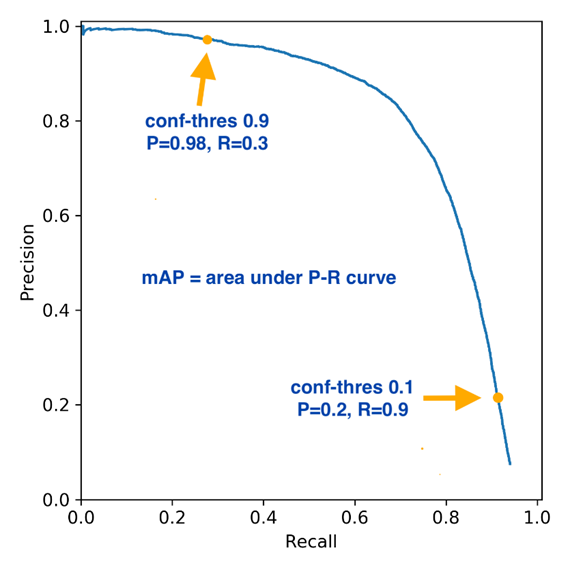

## Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      1374
           1       0.57      0.55      0.56       800
           2       0.69      0.68      0.68      1951

    accuracy                           0.66      4125
   macro avg       0.64      0.64      0.64      4125
weighted avg       0.66      0.66      0.66      4125



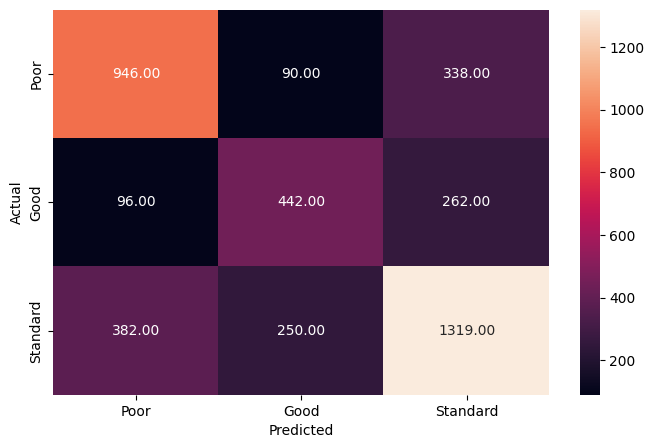

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
estimator = DecisionTreeClassifier(random_state=1)

# Cuadrícula de parámetros
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Ejecutar la búsqueda
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Establecer el clf a la mejor combinación de parámetros
estimator = grid_obj.best_estimator_

# Ajuste el mejor algoritmo a los datos.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

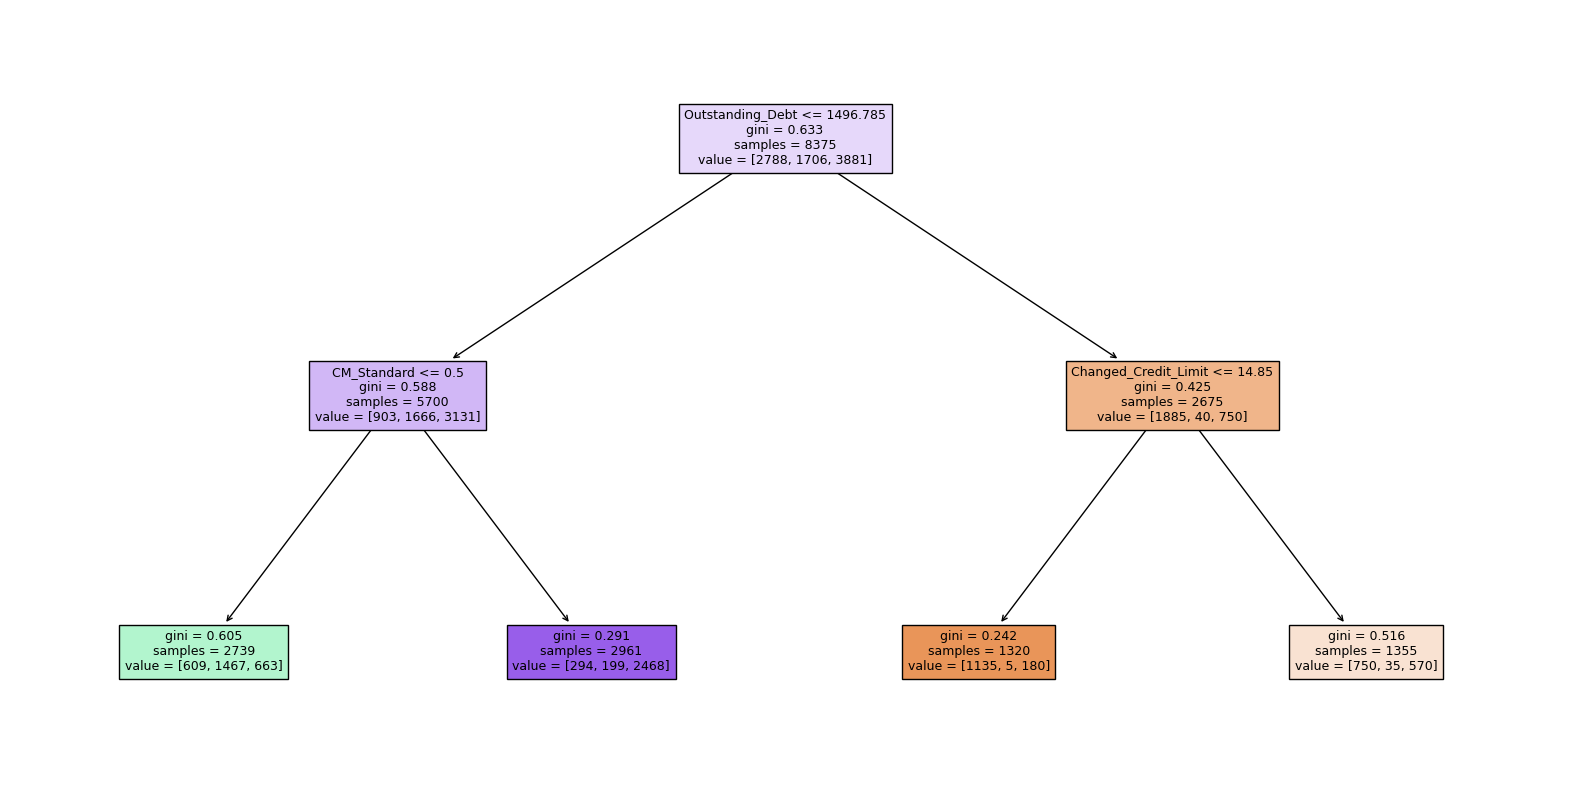

In [ ]:
#Visualizando el Árbol de Decisión
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=7,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# El siguiente código agregará flechas a la división del árbol de decisión si faltan
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

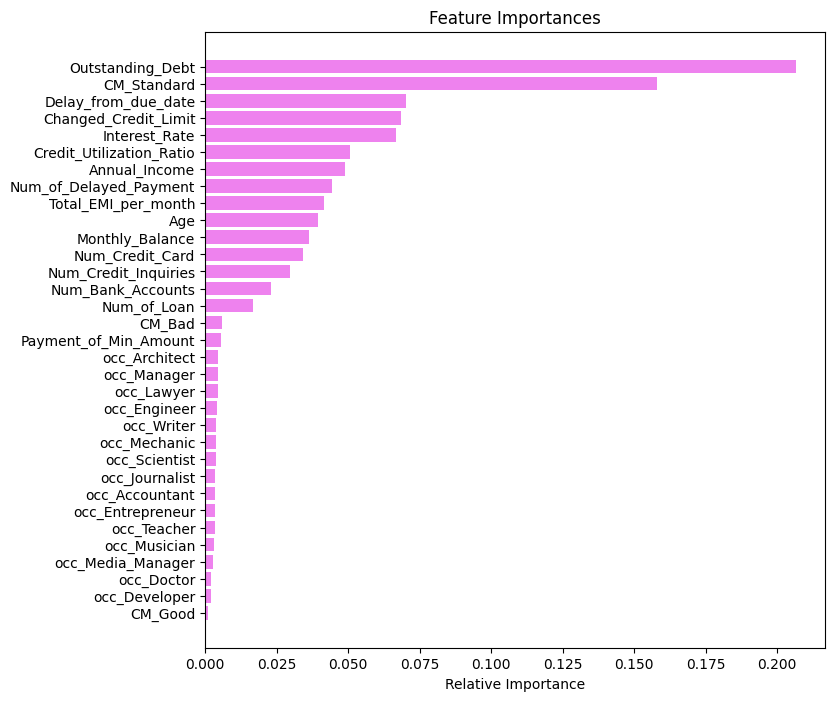

In [ ]:
#Imprimimos un grafico de barras con las variables mas importantes (Árbol de decisión)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Asignar puntajes a las características de entrada de un modelo predictivo que indica la importancia relativa de cada característica al hacer una predicción

from sklearn.tree import export_graphviz
import graphviz
import io
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz


clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=7, min_samples_leaf=5)

clf_pruned.fit(X_train, y_train)

dot_data = StringIO()
feature_cols = X.columns
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])

clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False) #.head(20)

,FeatureImportance
Outstanding_Debt,0.340043
CM_Standard,0.321989
Delay_from_due_date,0.082125
Interest_Rate,0.079937
Changed_Credit_Limit,0.048563
Num_Credit_Card,0.035847
Num_of_Delayed_Payment,0.024570
Total_EMI_per_month,0.012959
Num_Bank_Accounts,0.010799
CM_Bad,0.010494


# Conclusiones

Se observa la comparación de los 3 algoritmos de clasificaión implementados, con sus metricas respectivas 






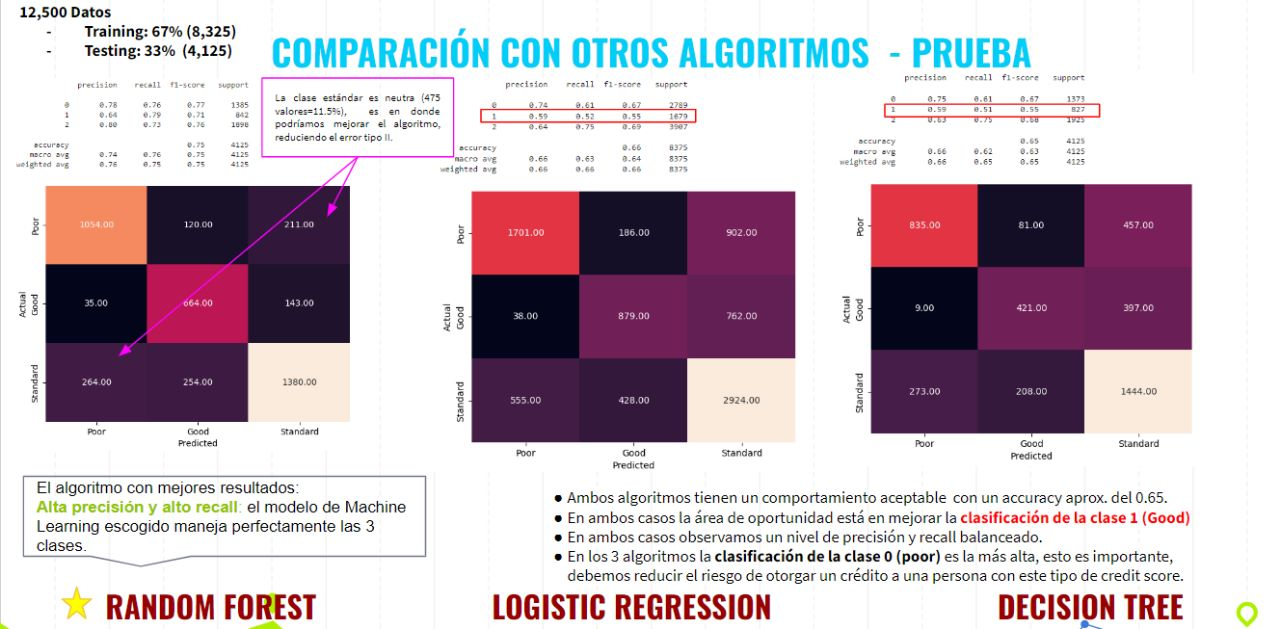



**Se observa entonces, que el mejor resultado, fue el algoritmo de RANDOM FOREST teniendo una eficacia en el ACCURACY del 0.75**